# 1. Set-up
- Import libraries
- Set directories
- A function to retrieve the data about 1 star

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as f
from os import listdir

In [35]:
#The paths to the directories containing the stars
path_sin = 'data/single_stars'
path_bin = 'data/possible_binaries'

In [36]:
#Lists of names of stars
sin_st = sorted(listdir(path_sin)) 
bin_st = sorted(listdir(path_bin)) 

In [37]:
def star_info(path, idx):
    ''' Returns the name of the star and the date of the observation at index idx as a tuple. '''
    star_names = sorted(listdir(path))
    return star_names[idx], listdir(f'{path}/{star_names[idx]}')[0]

In [38]:
def star_data(path, idx):
    ''' Returns the flux data of the star at the corresponding data at index idx as a 2d numpy array. '''
    name, date = star_info(path, idx)
    with f.open(f'{path}/{name}/{date}/{name}_{date}_cube_flux_processed_right.fits') as hdul:
        data = hdul[0].data
    return data[0]

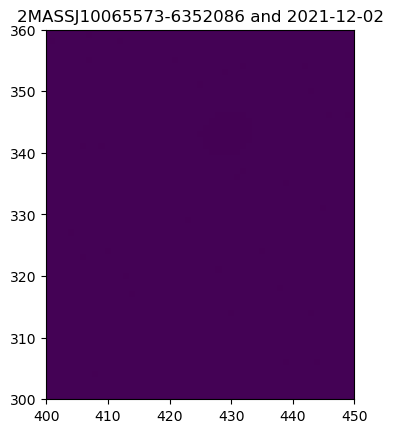

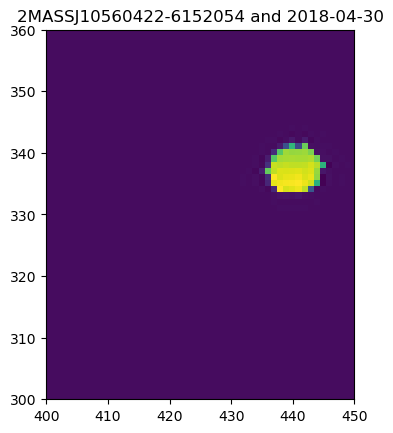

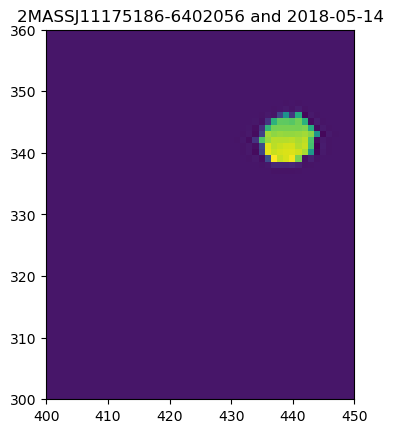

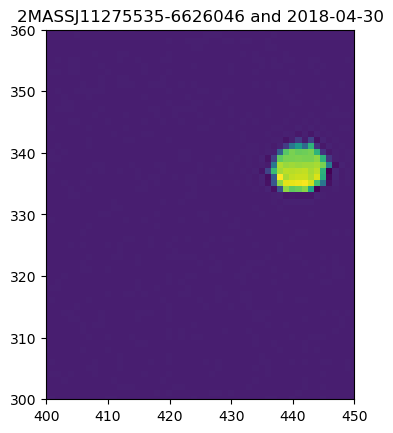

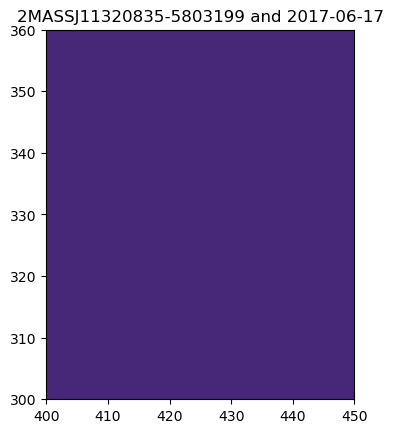

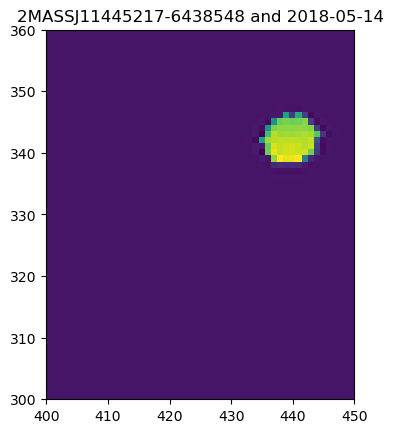

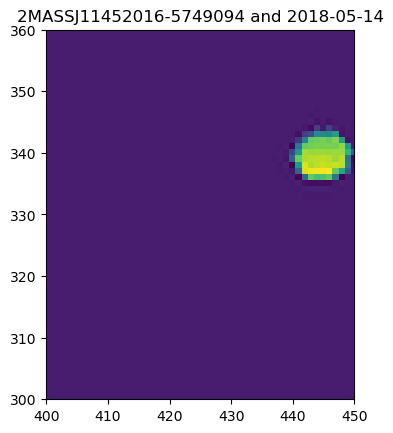

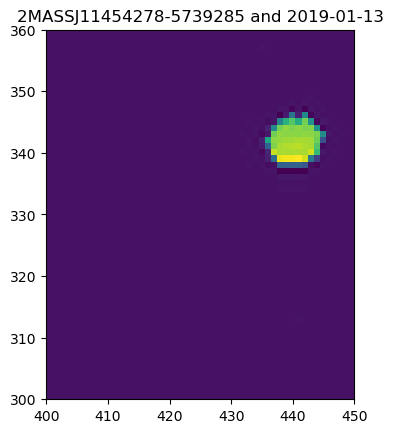

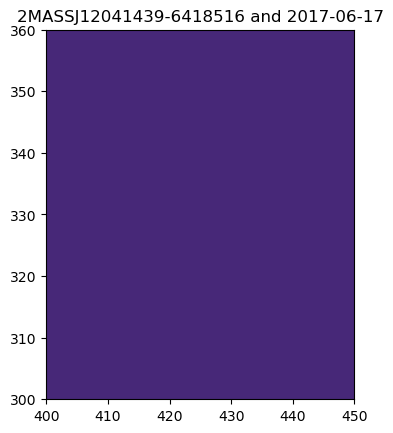

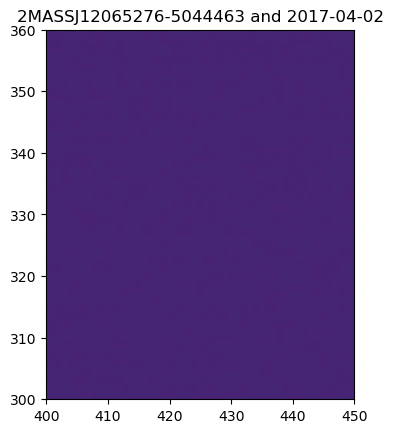

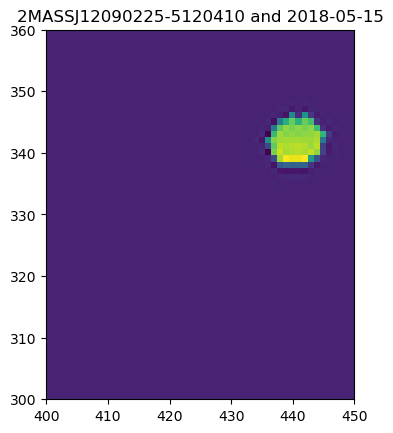

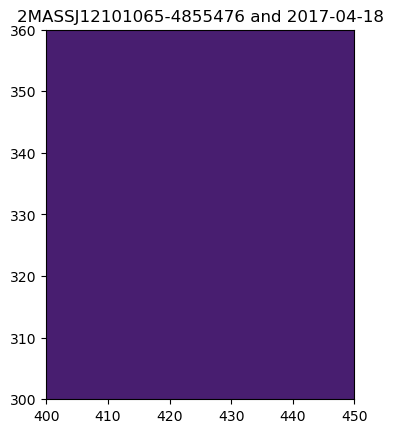

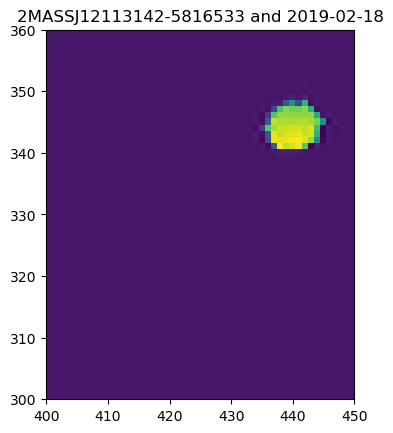

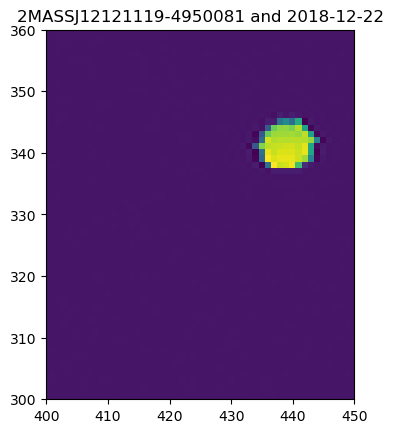

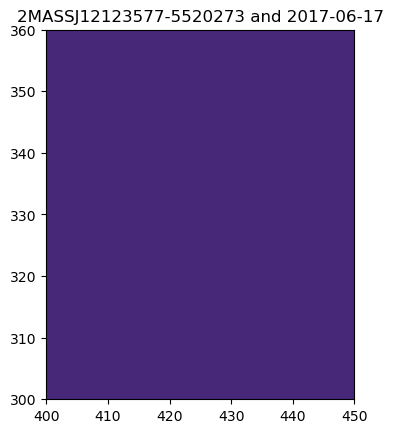

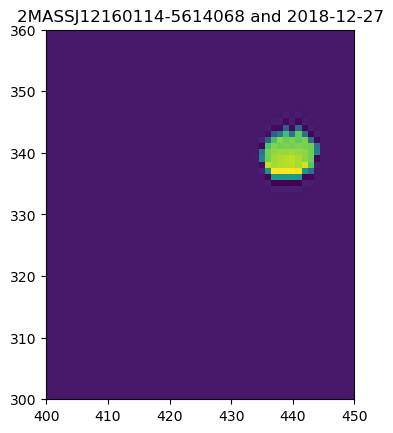

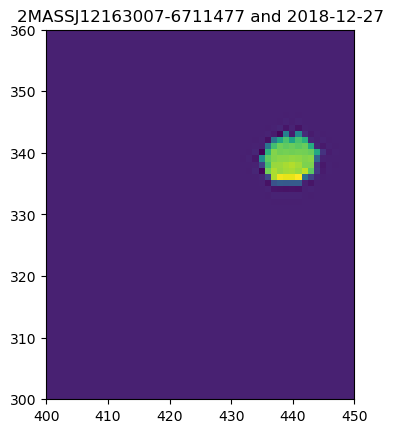

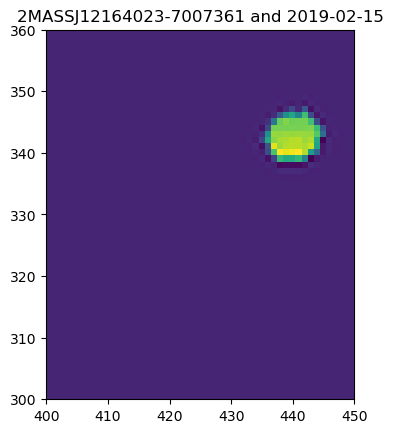

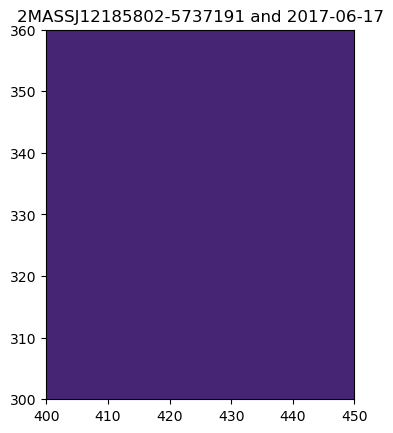

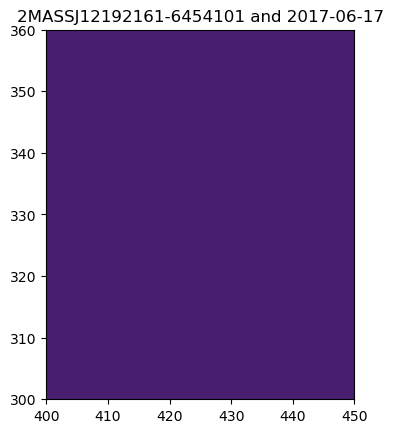

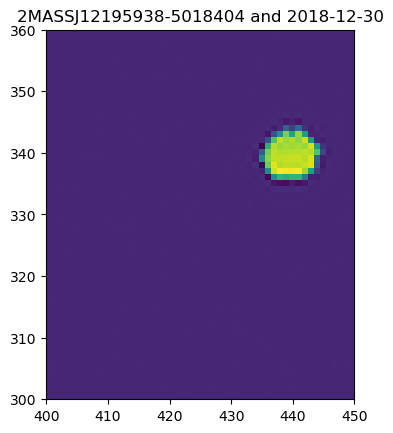

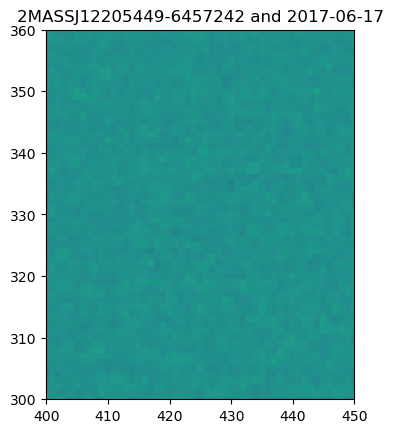

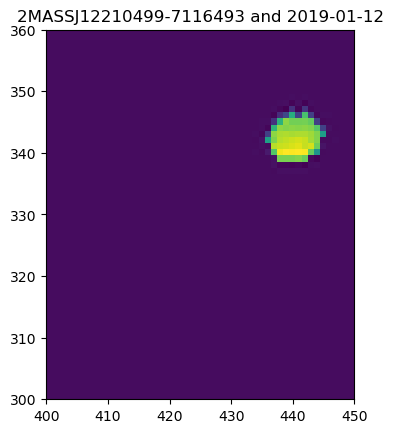

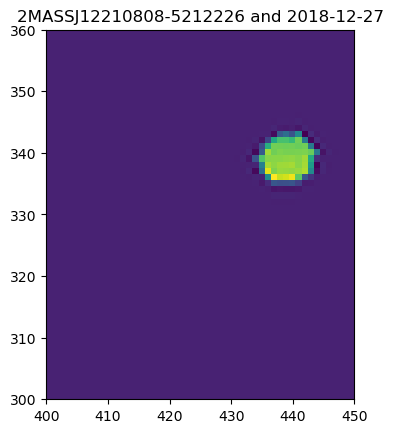

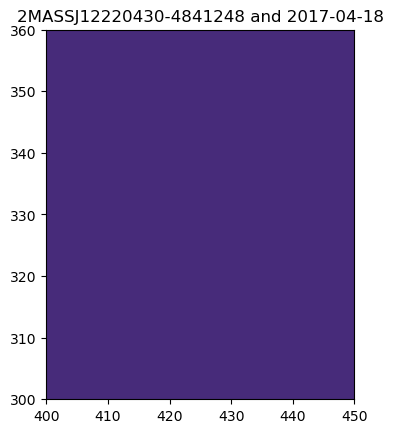

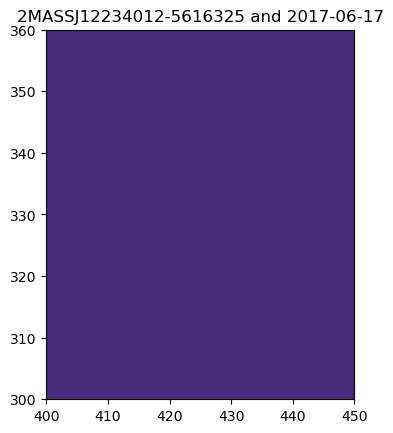

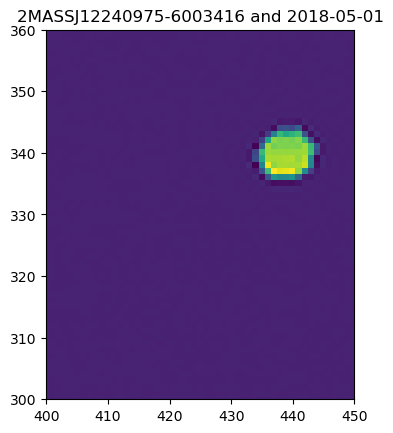

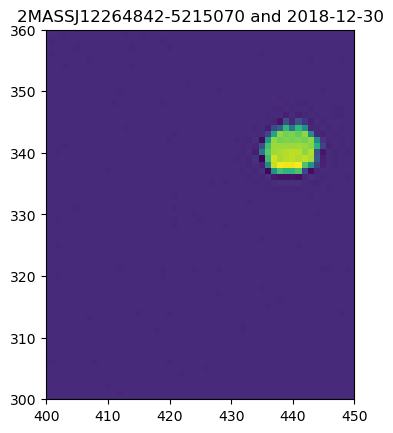

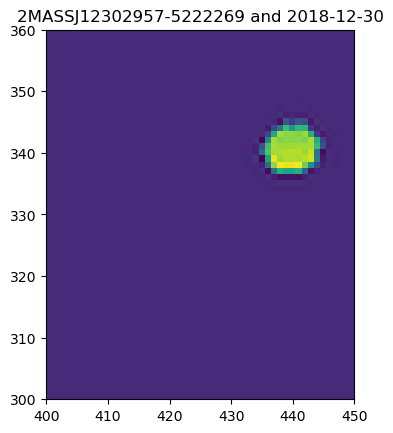

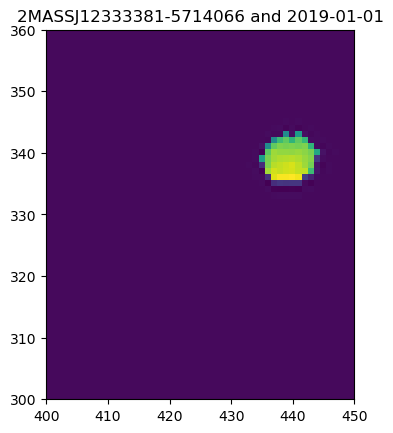

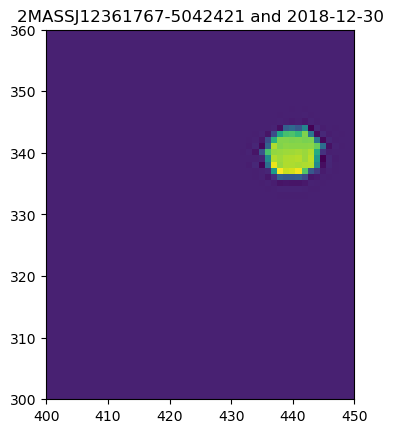

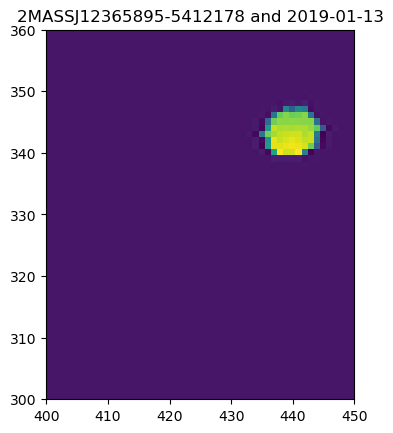

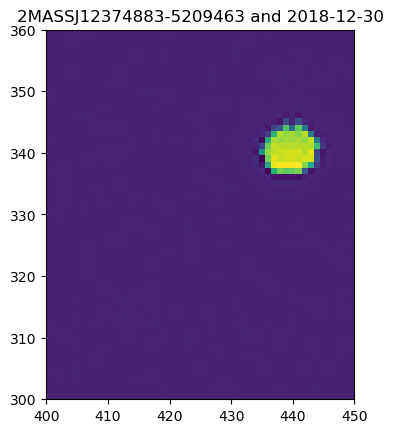

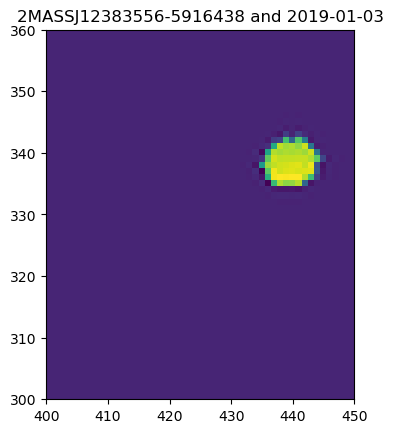

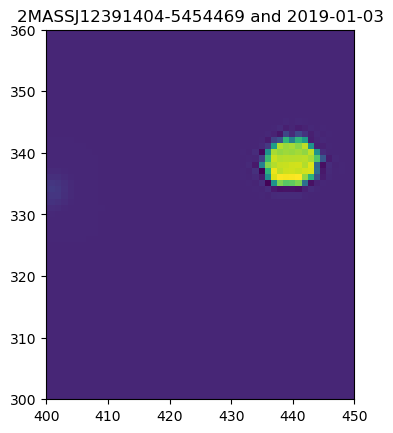

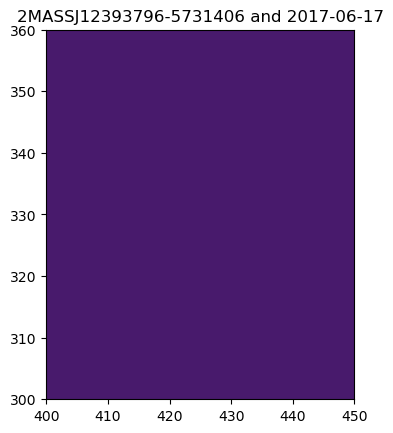

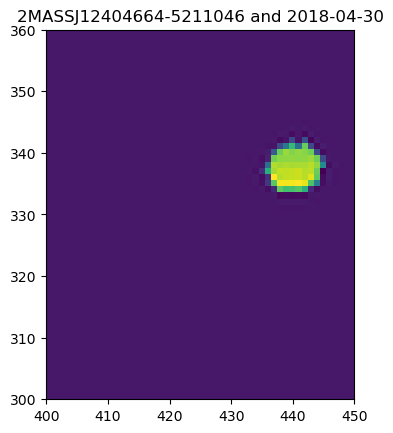

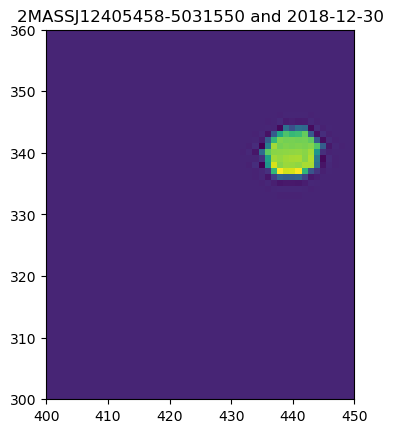

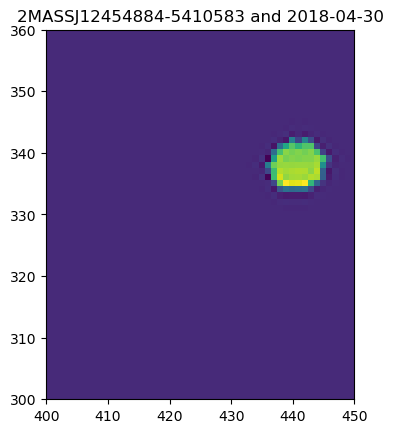

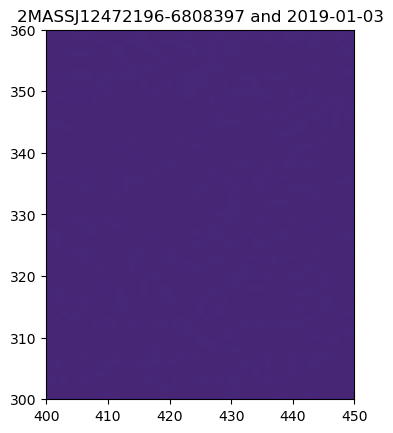

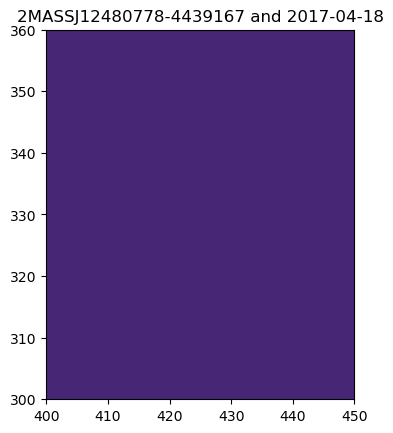

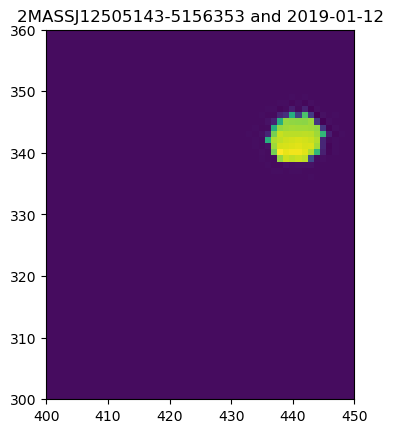

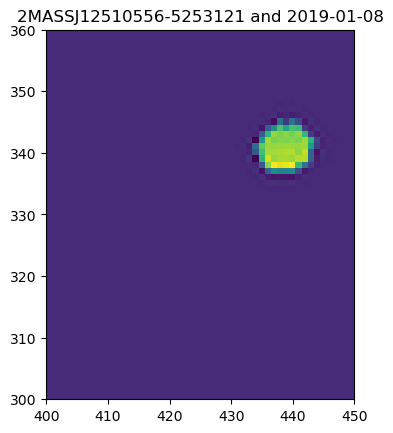

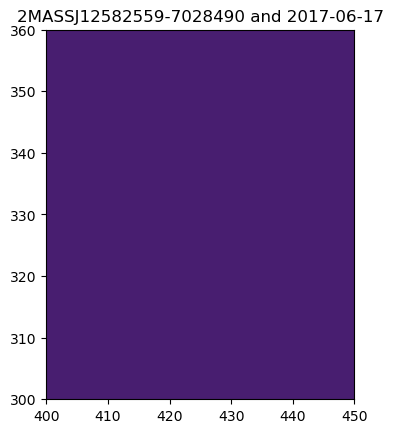

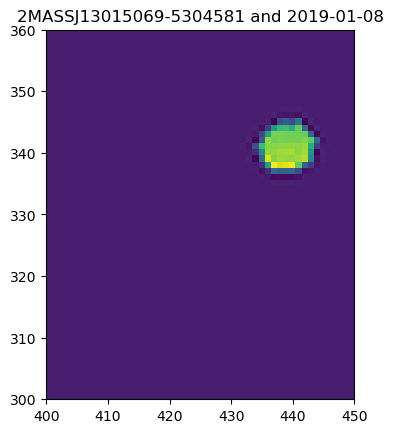

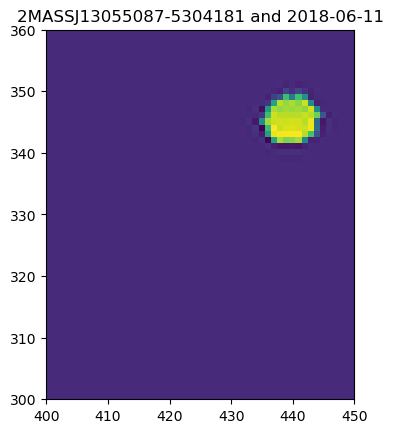

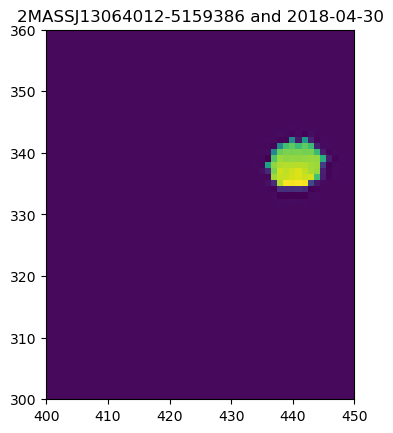

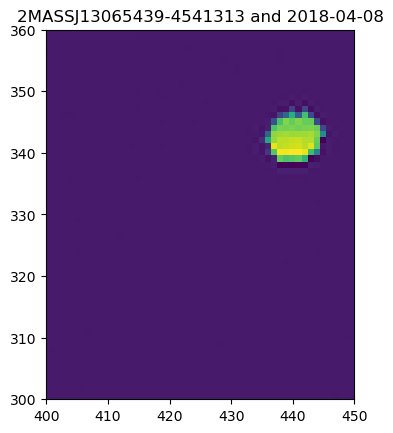

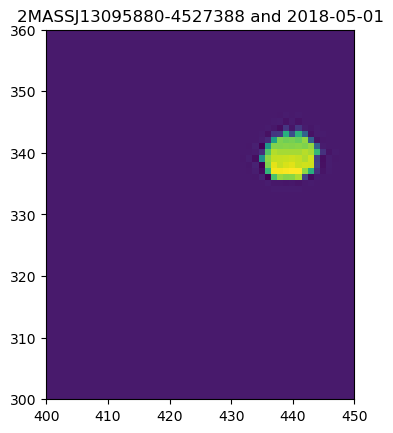

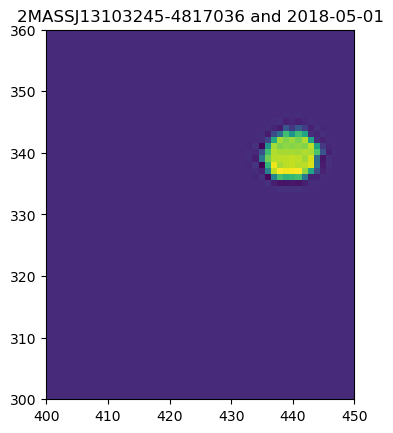

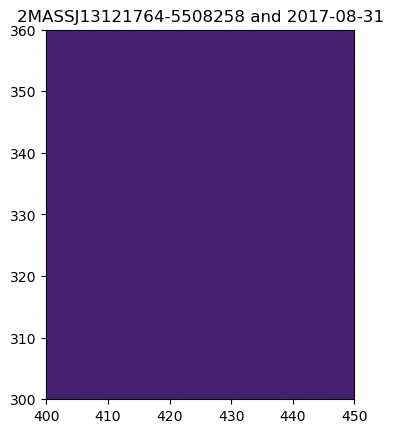

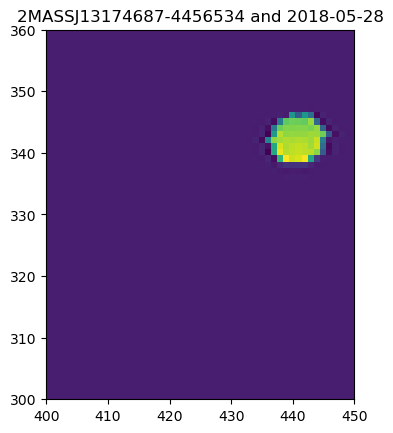

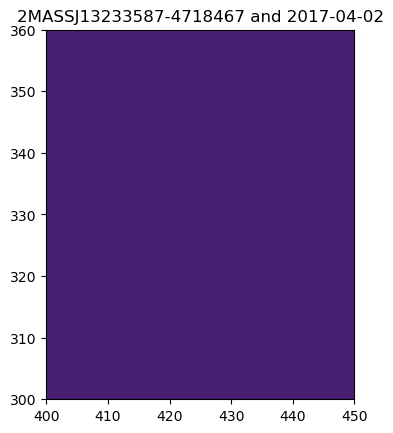

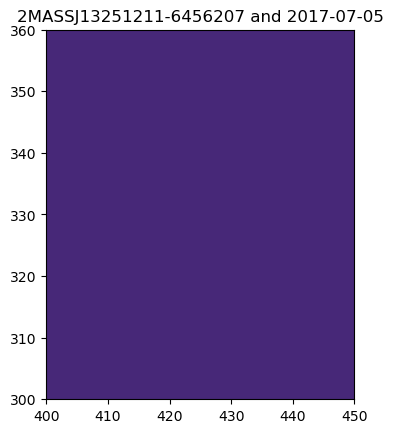

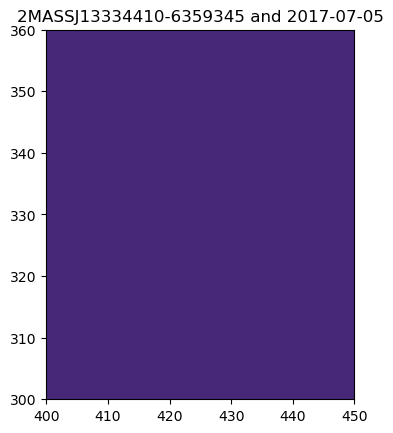

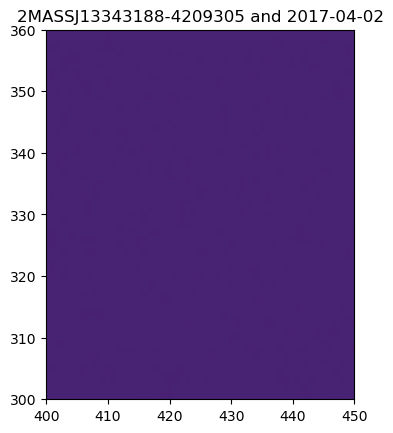

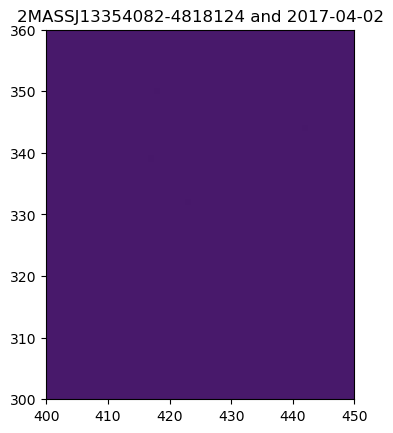

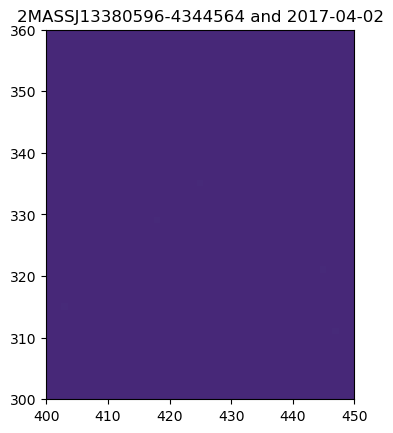

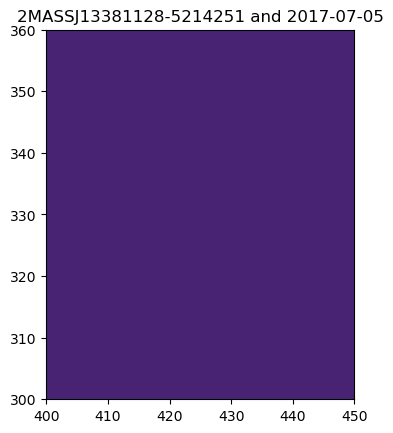

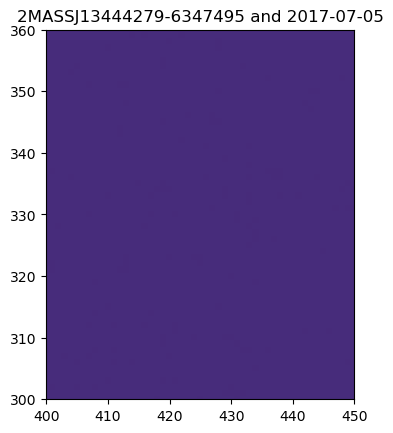

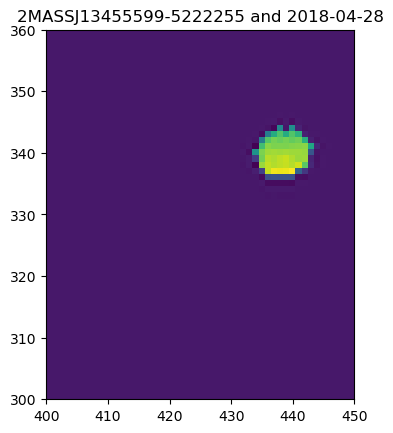

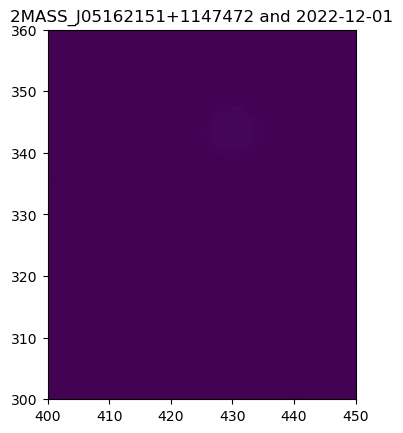

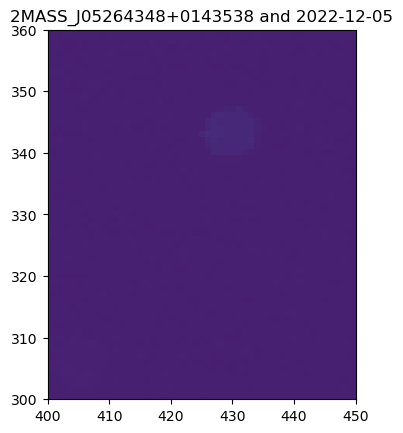

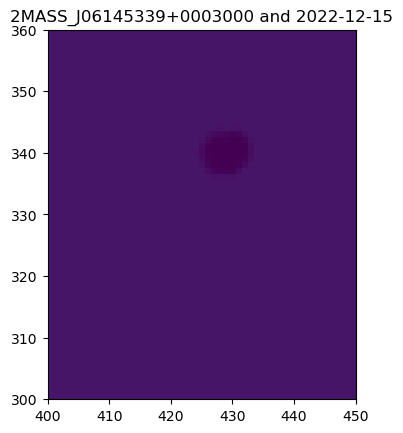

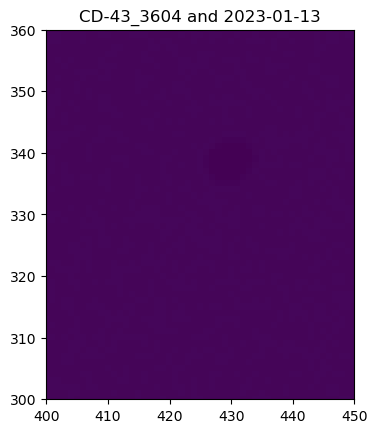

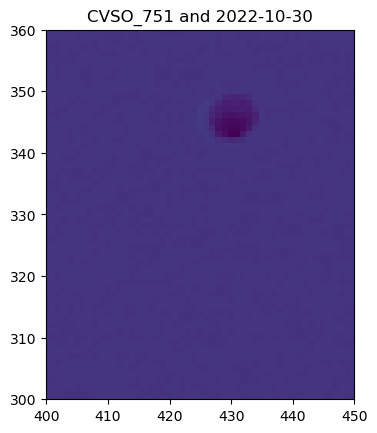

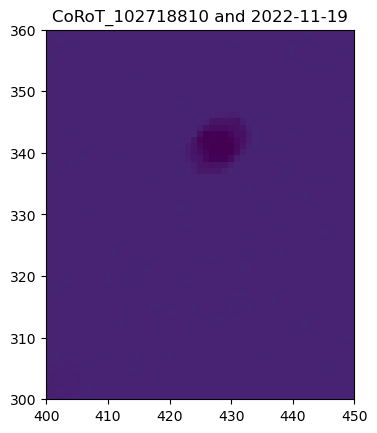

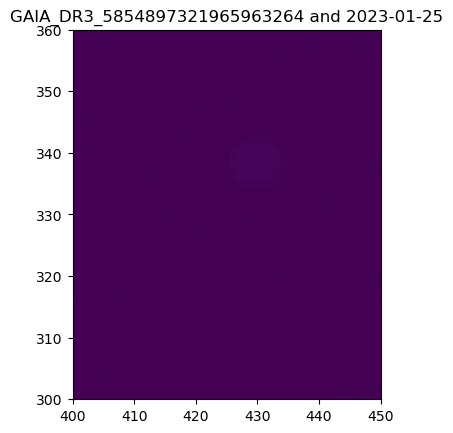

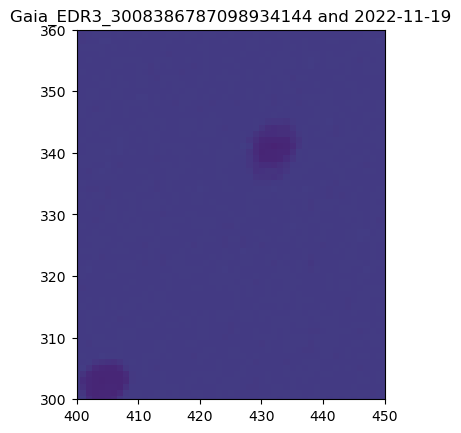

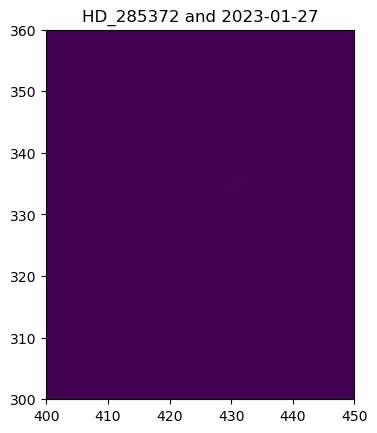

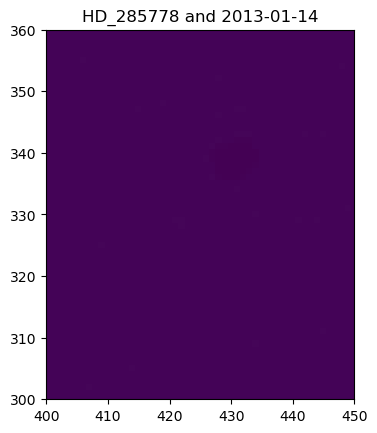

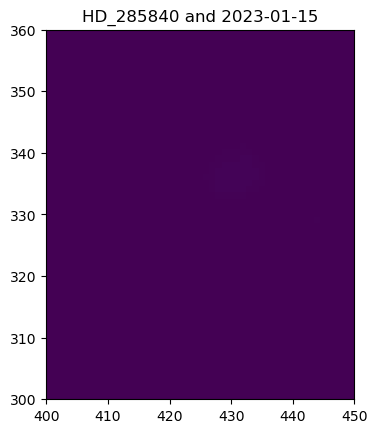

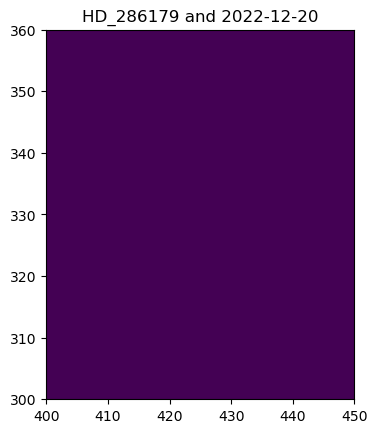

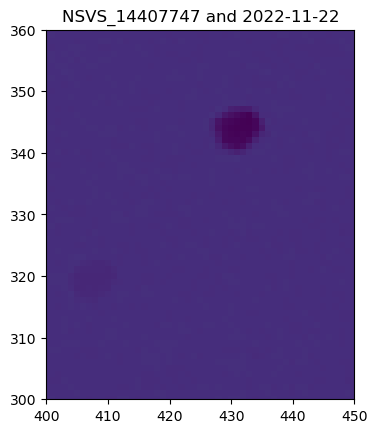

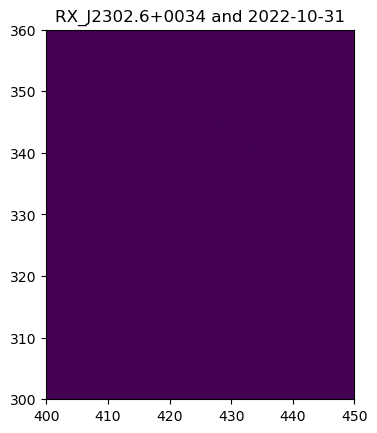

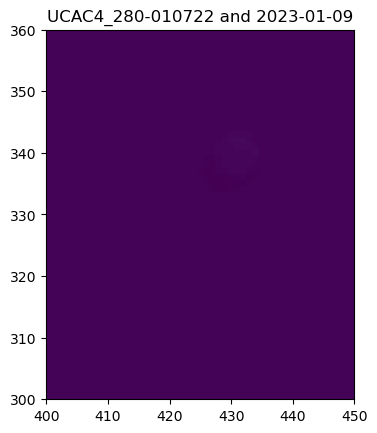

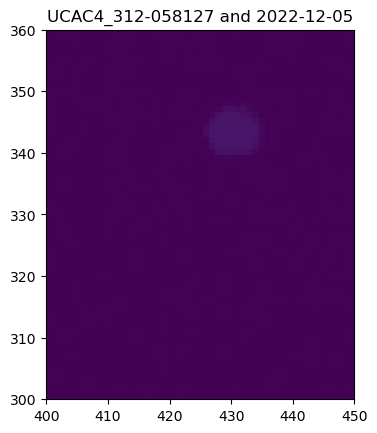

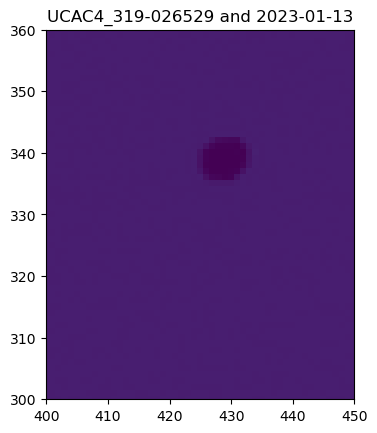

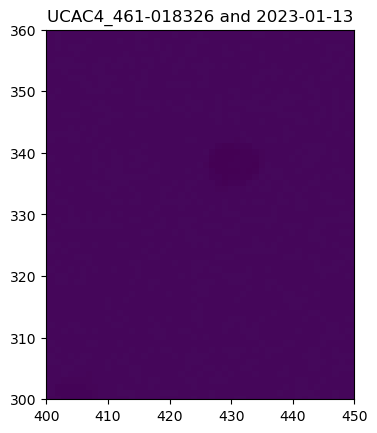

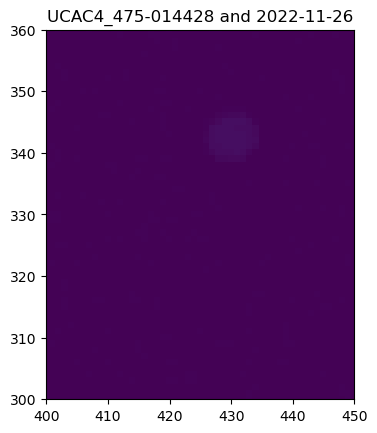

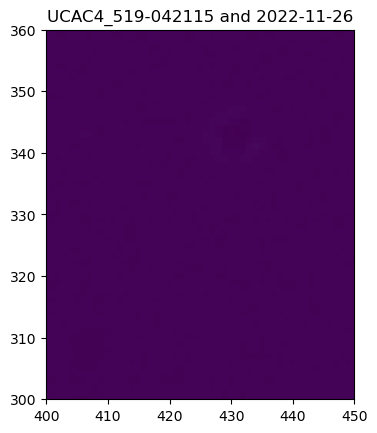

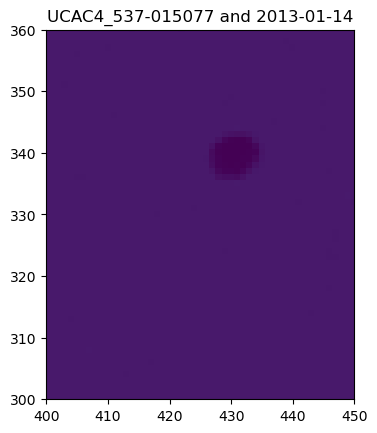

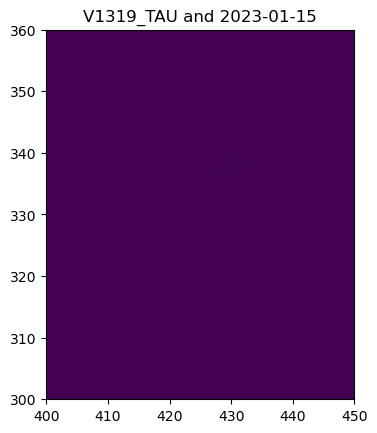

In [106]:
for i in range(len(sin_st)):
    star6 = star_data(path_sin, i)
    name, date = star_info(path_sin, i)
    plt.imshow(star6)
    plt.title(f'{name} and {date}')
    plt.gca().invert_yaxis()
    plt.xlim(400, 450)
    plt.ylim(300, 360)
    plt.show()

# 2. Cutting out central 200 pixels
- Circle of 200 pixels around center
- 200 x 200 pixels around center

In [39]:
#Area you want to be left with
A = 200

In [40]:
def mask_but_center(arr):
    ''' Masks everything but the area with size A in a circle around the center. '''
    x = y = np.linspace(-(len(arr))/2, (len(arr))/2, len(arr))
    x_grid, y_grid = np.meshgrid(x, y)
    r_grid = np.sqrt(x_grid**2 + y_grid**2)
    arr[r_grid > np.sqrt(A/np.pi)] = None #np.sqrt(A/np.pi) gives the radius of a circle with size A
    return arr

def normalize(arr):
    ''' Normalizes the array '''
    return arr/np.max(arr)

#look at hot pixels

def calibration(arr):
    norm_arr = normalize(arr)
    return mask_but_center(norm_arr)

In [85]:
def print_stars(path, idx):
    ''' Print the masked and normalised flux image of the star at index idx. '''
    name, date = star_info(path, idx)
    ster = calibration(star_data(path_sin, idx))
    plt.imshow(ster)
    plt.gca().invert_yaxis()
    plt.title(f'{name}, {date}')
    plt.xlim(500, 524)
    plt.ylim(500, 524)
    plt.colorbar
    plt.show()

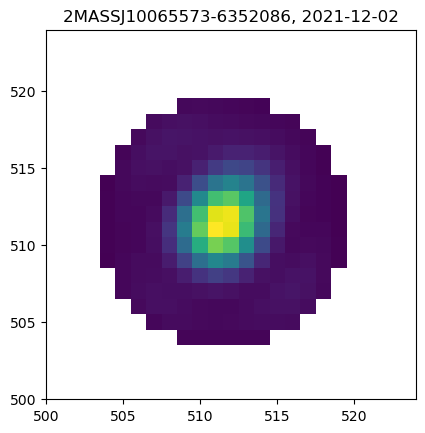

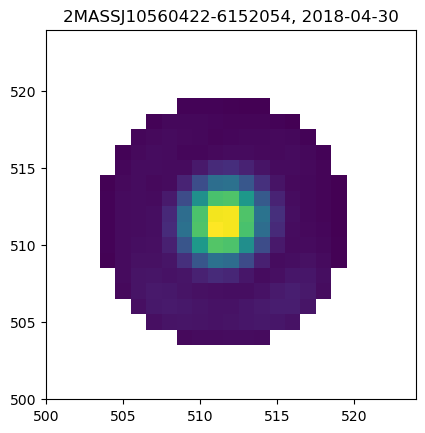

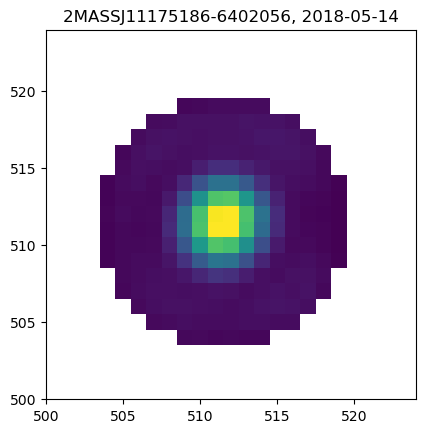

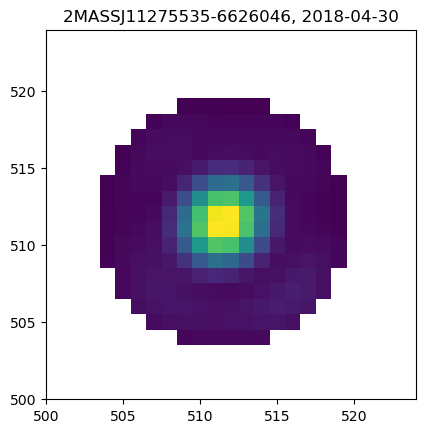

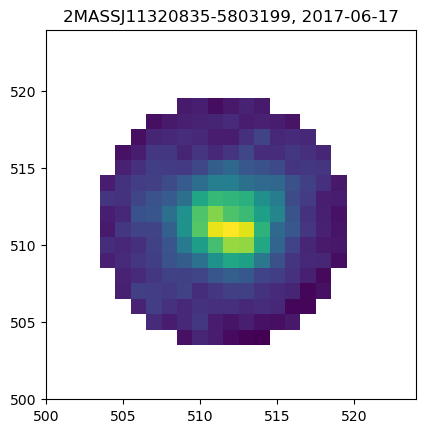

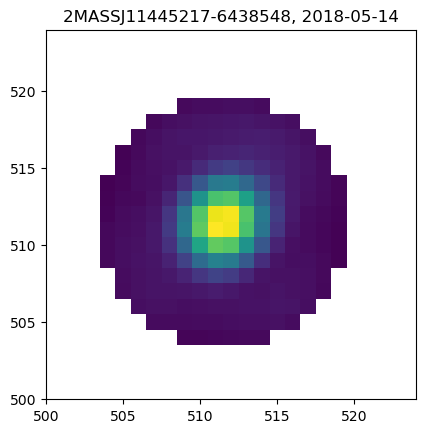

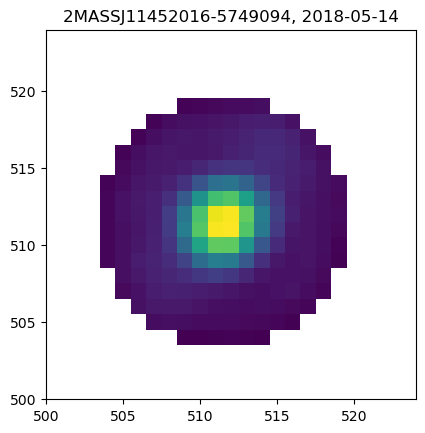

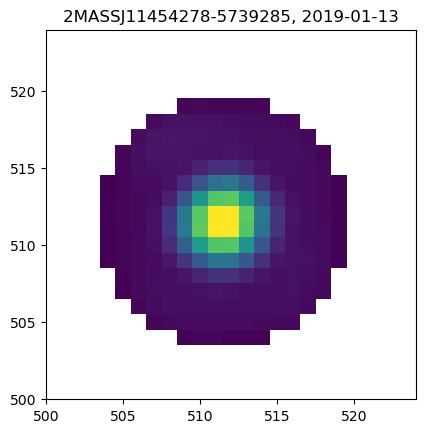

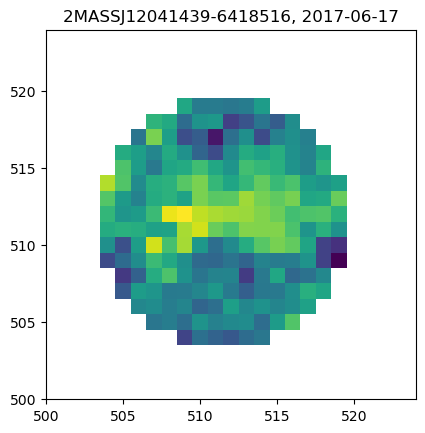

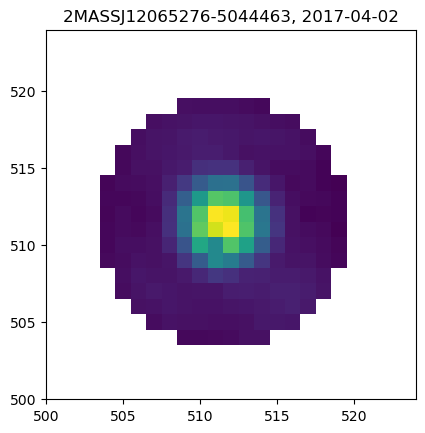

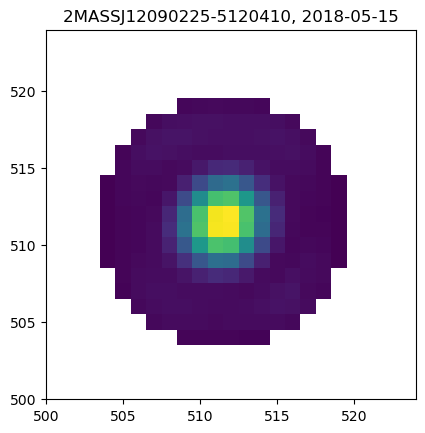

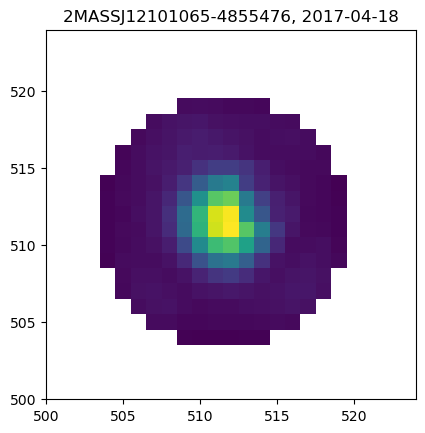

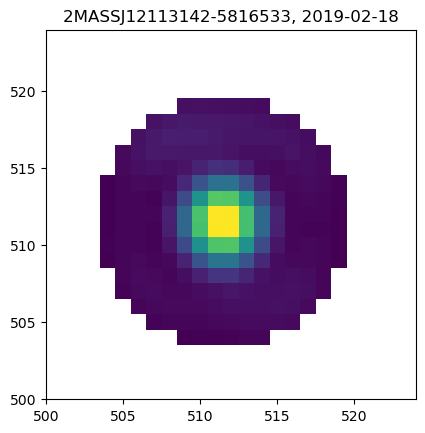

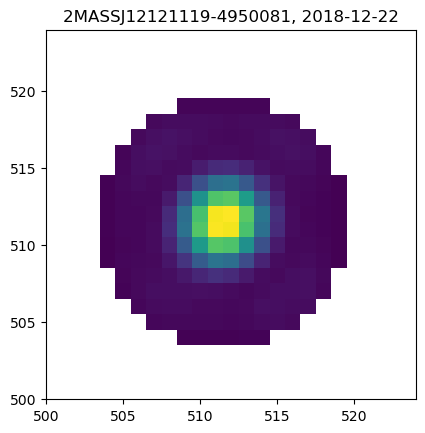

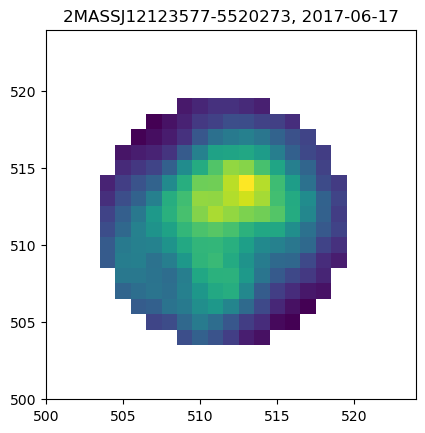

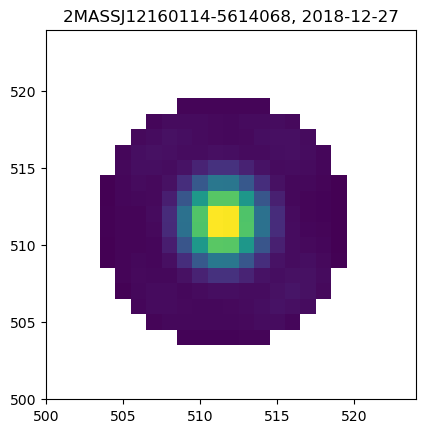

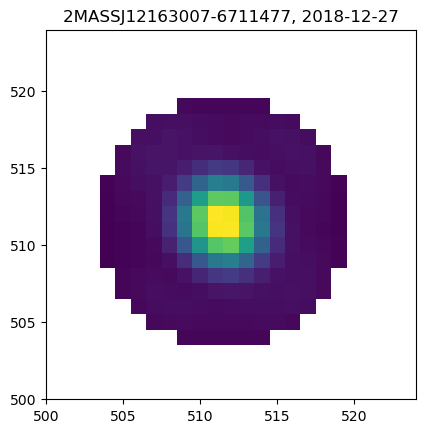

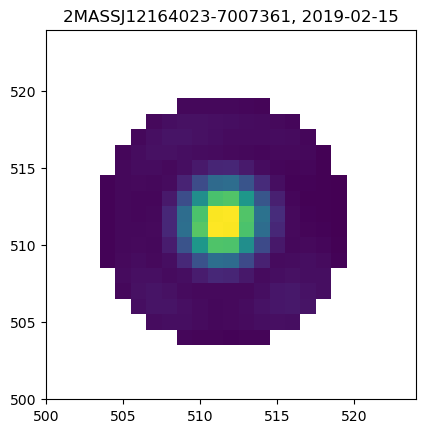

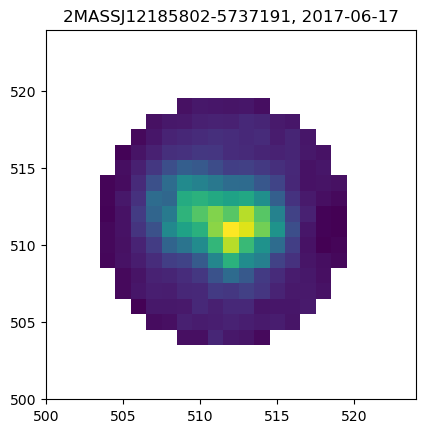

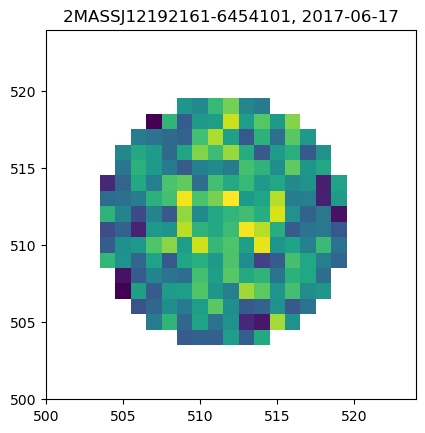

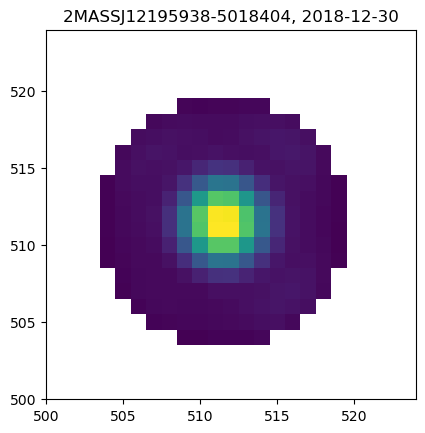

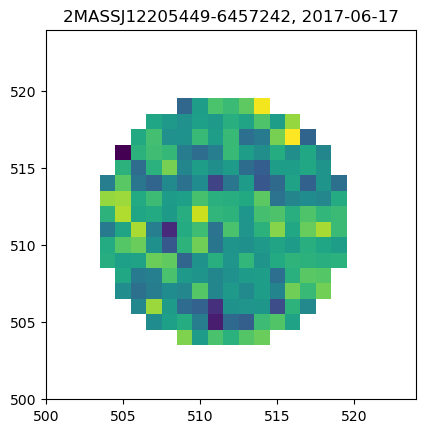

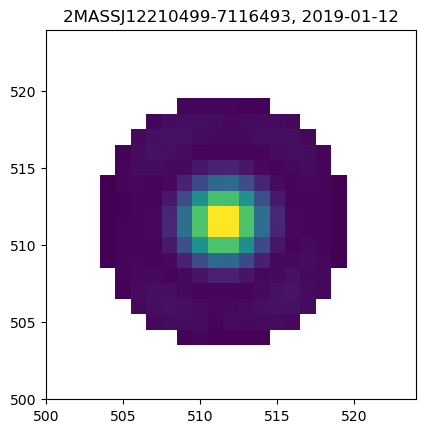

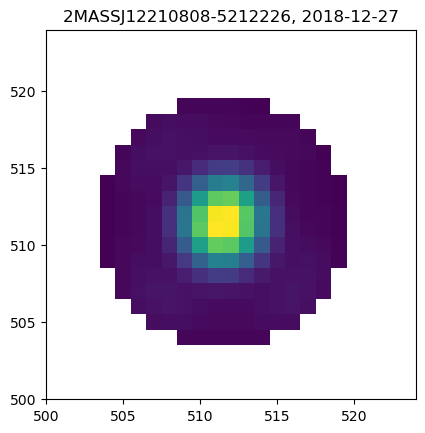

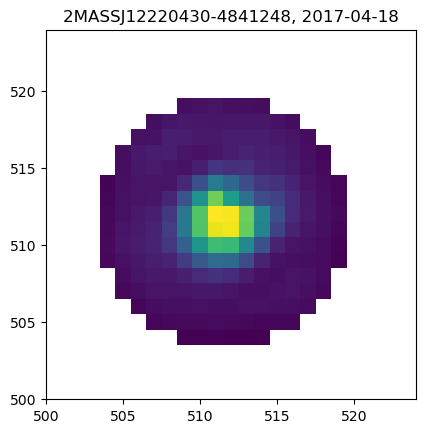

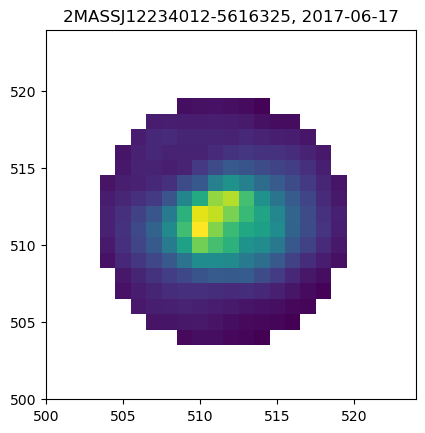

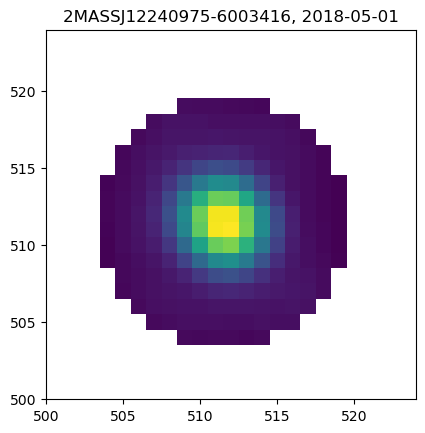

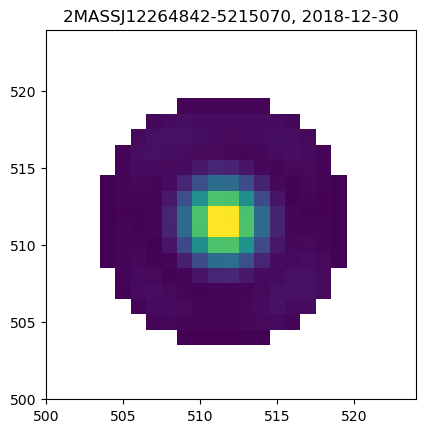

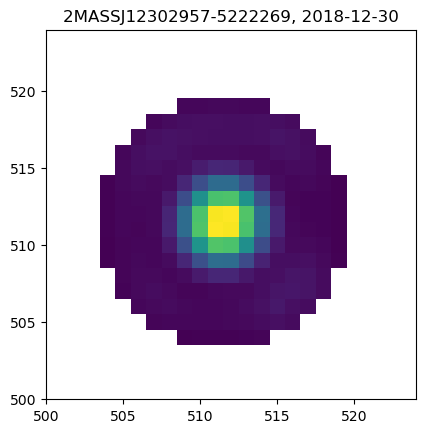

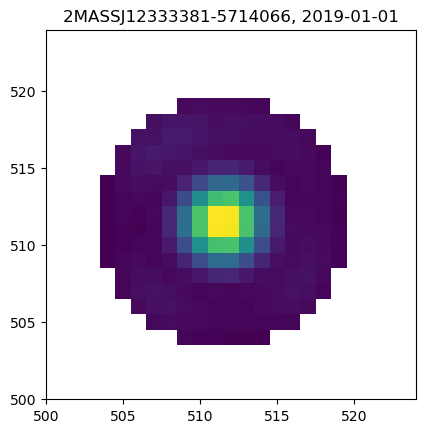

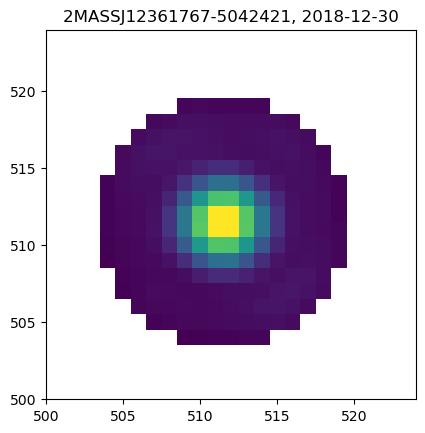

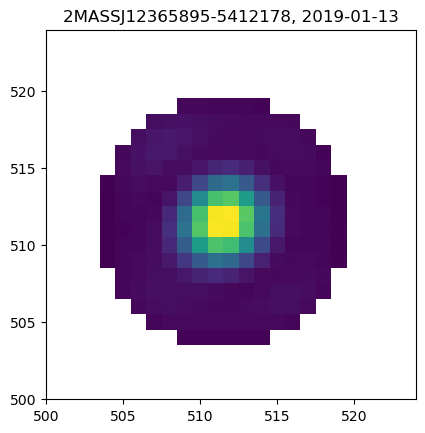

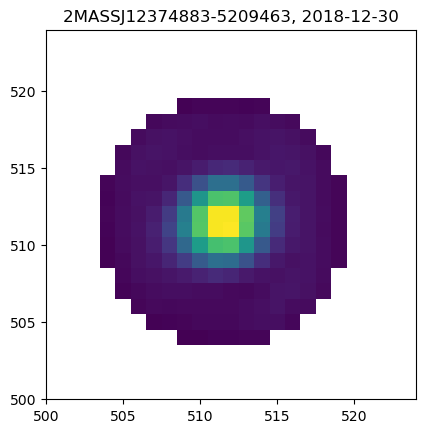

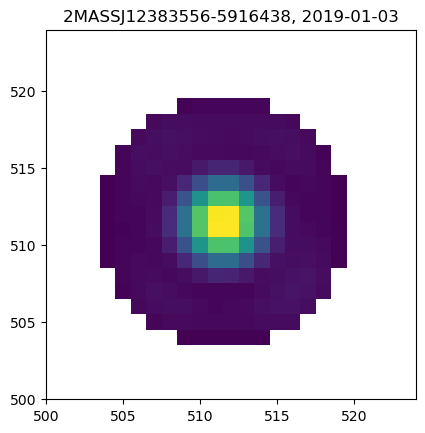

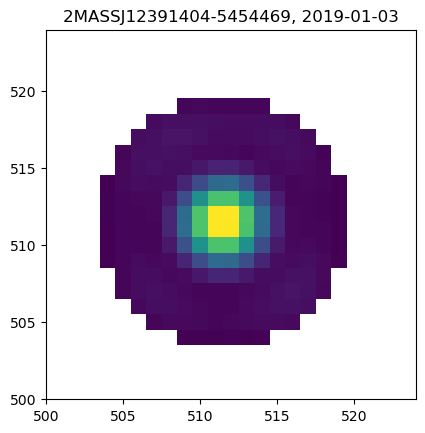

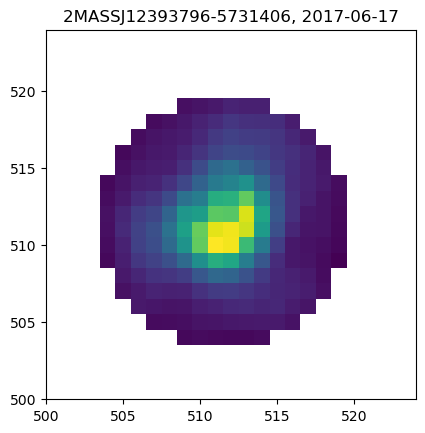

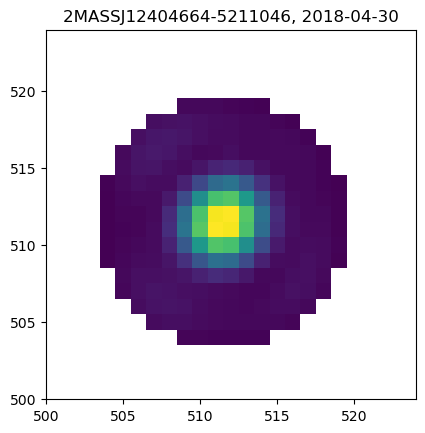

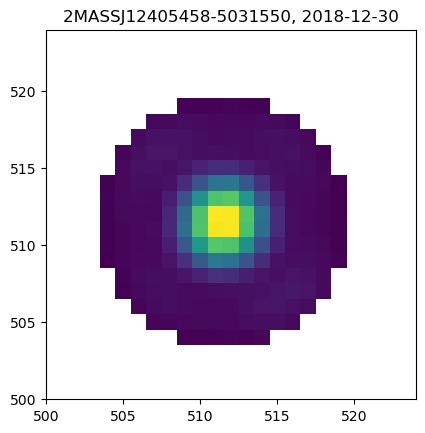

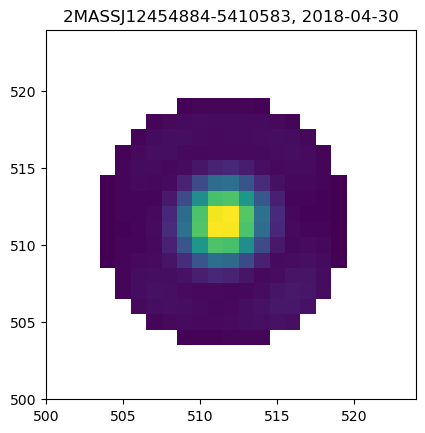

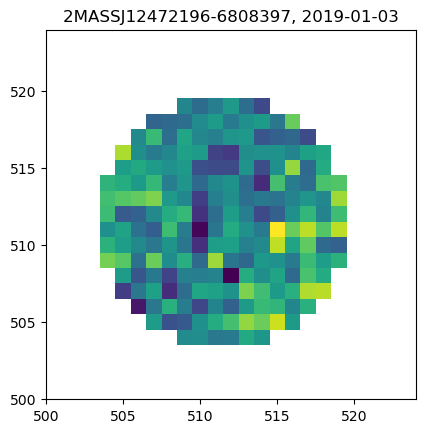

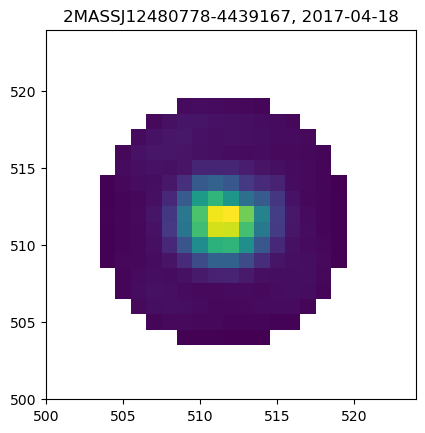

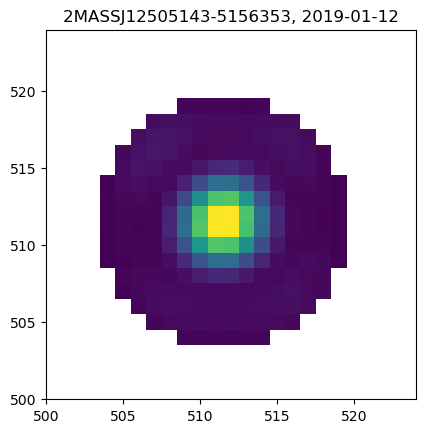

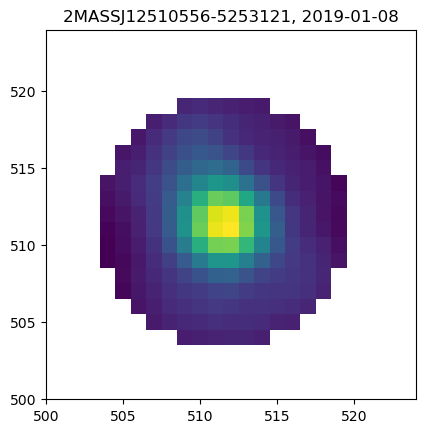

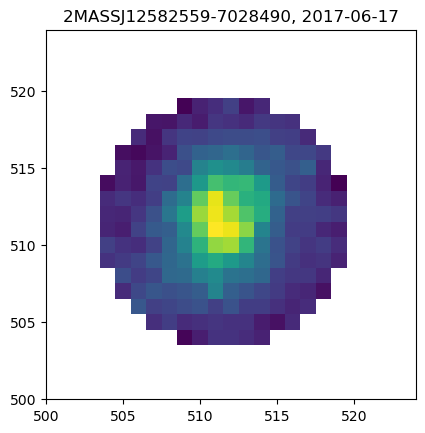

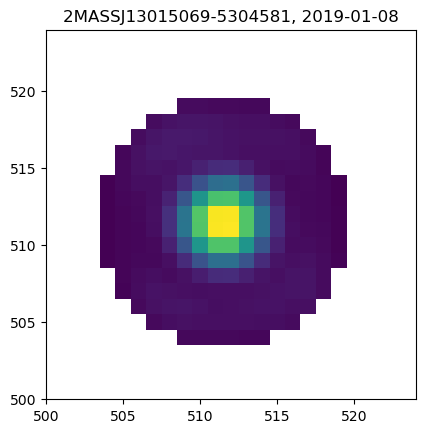

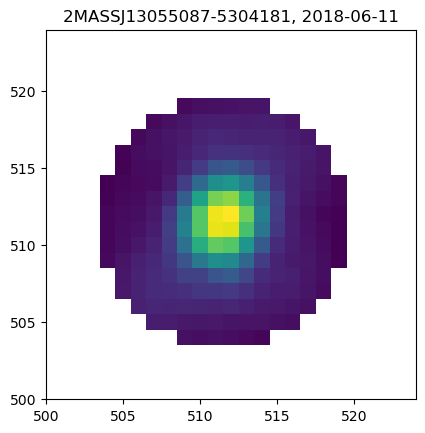

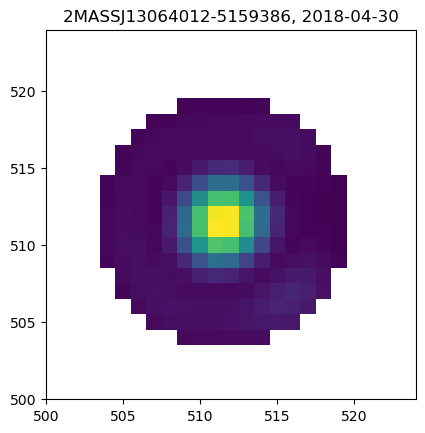

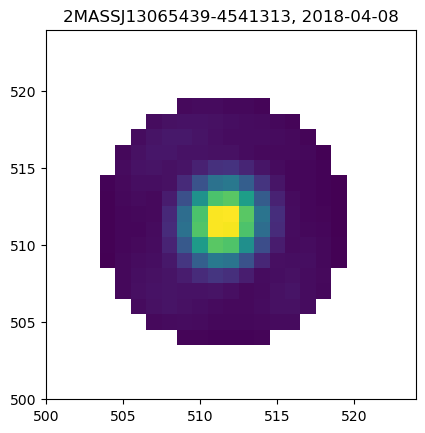

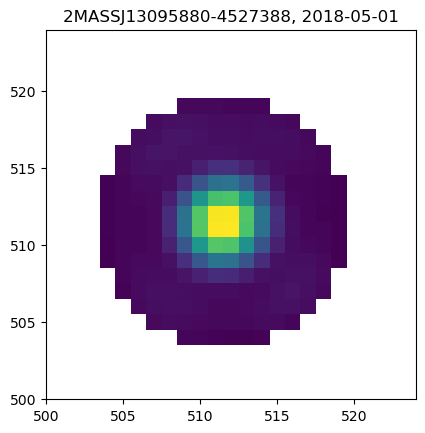

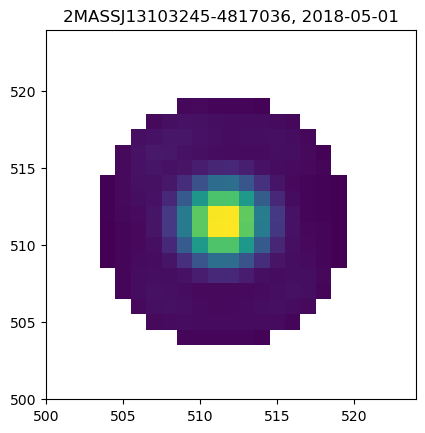

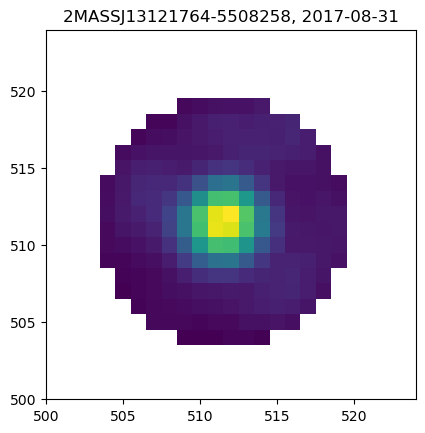

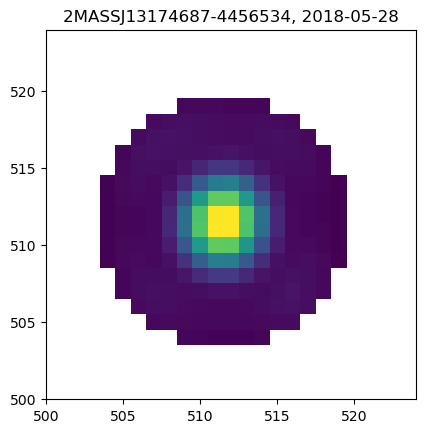

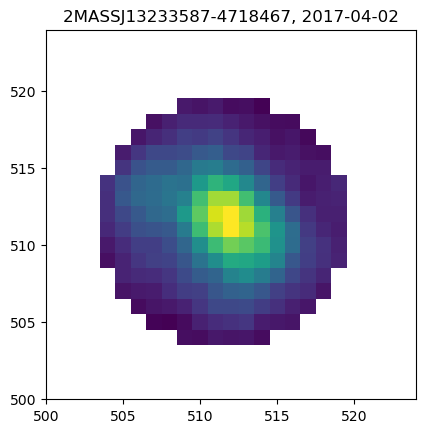

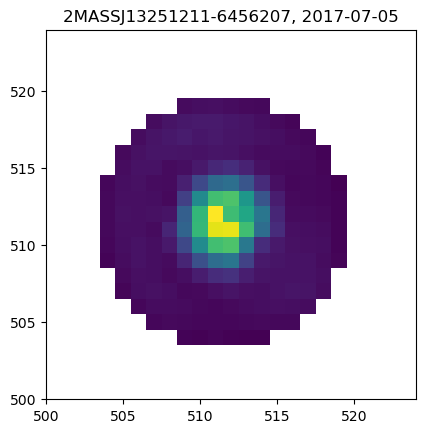

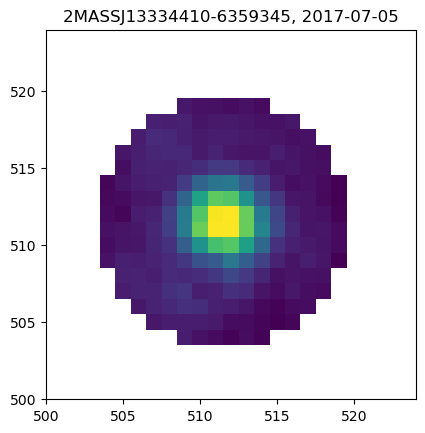

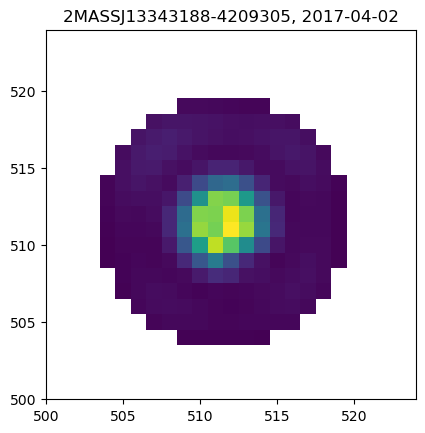

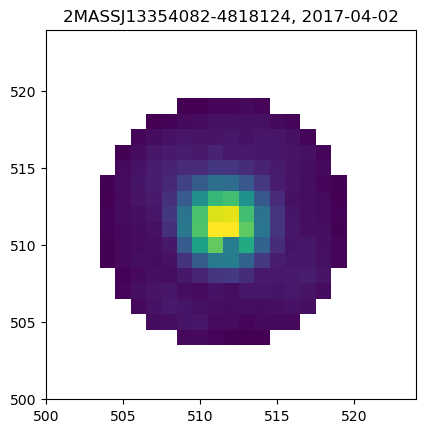

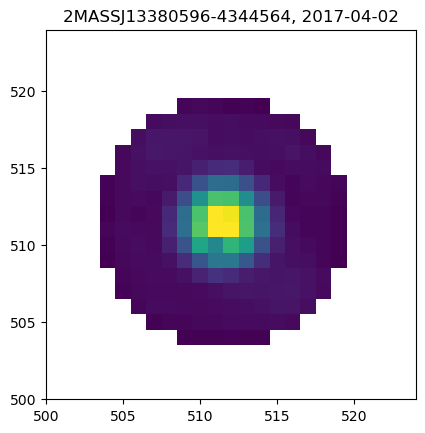

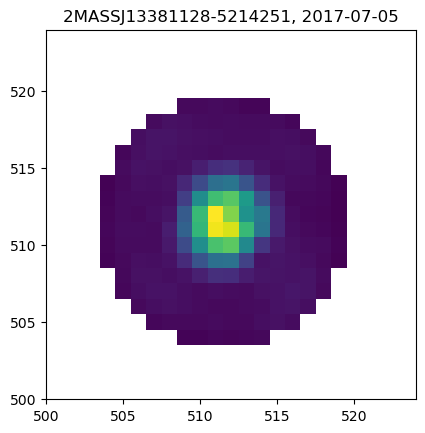

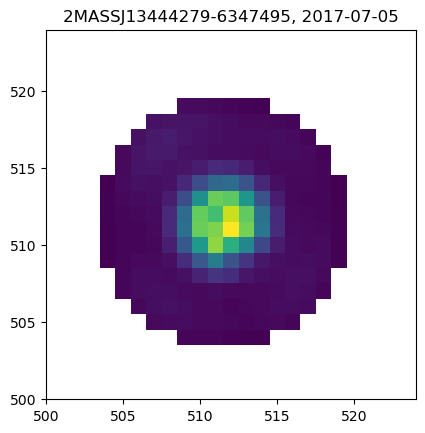

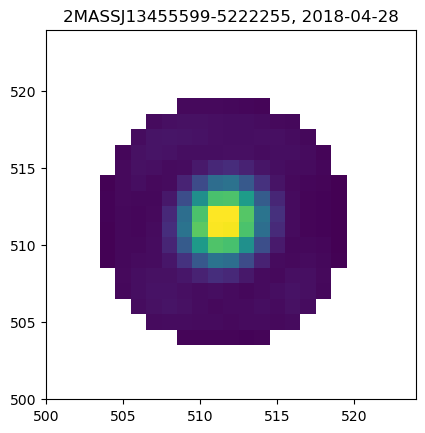

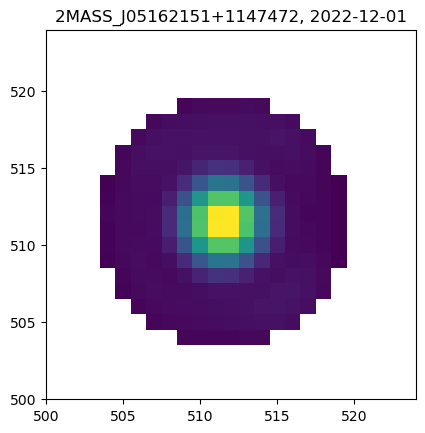

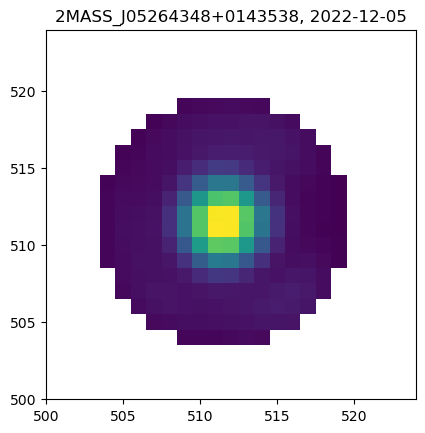

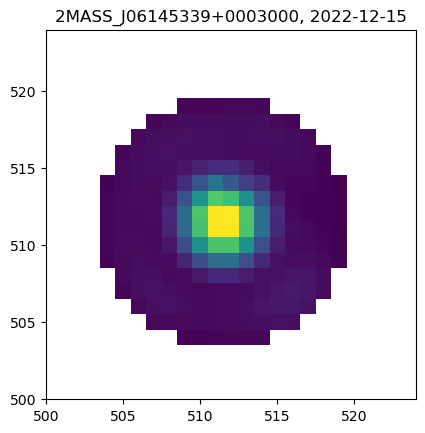

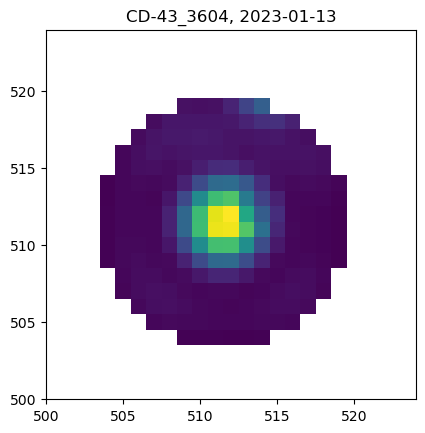

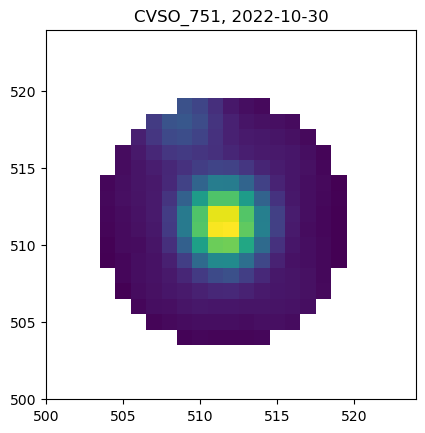

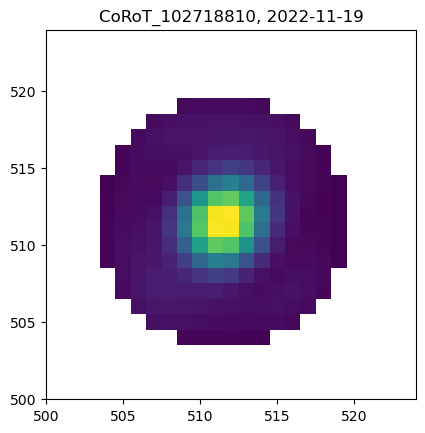

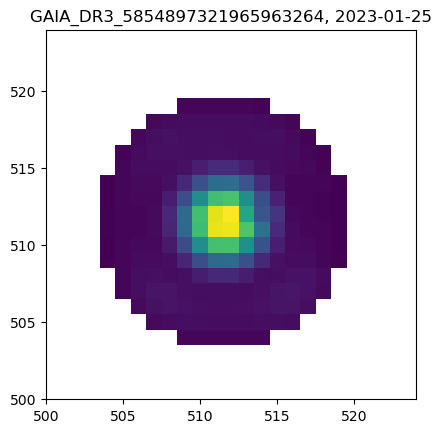

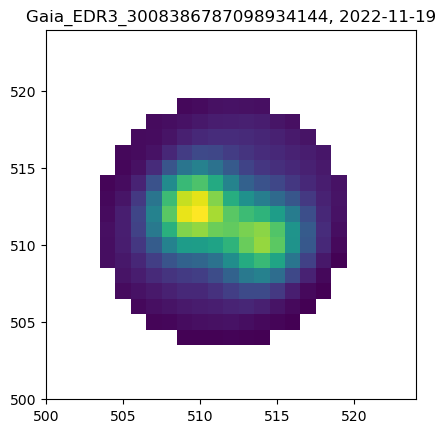

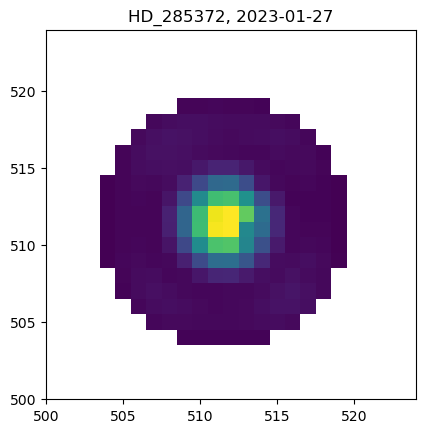

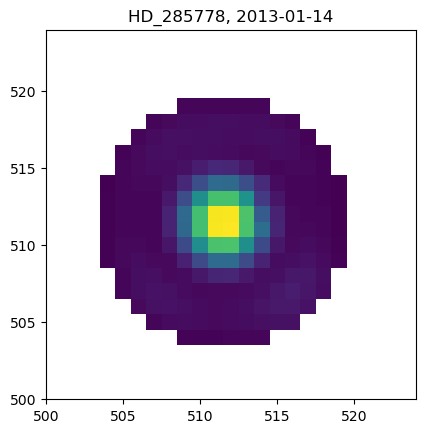

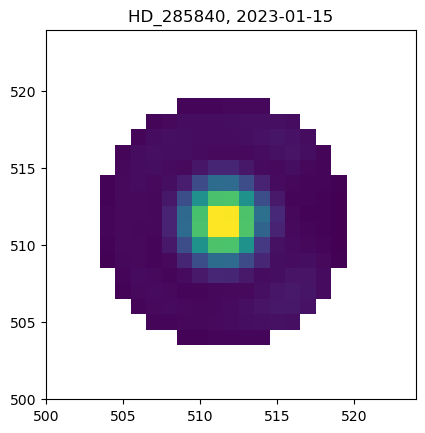

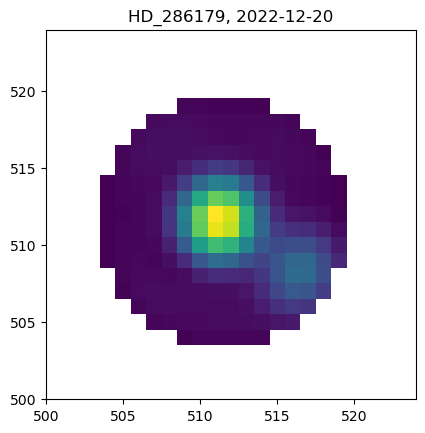

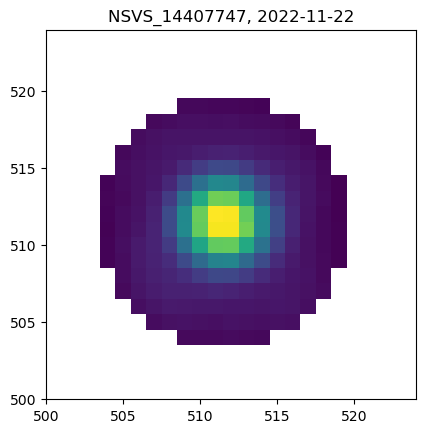

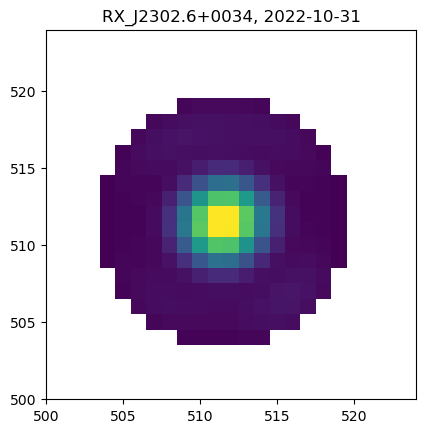

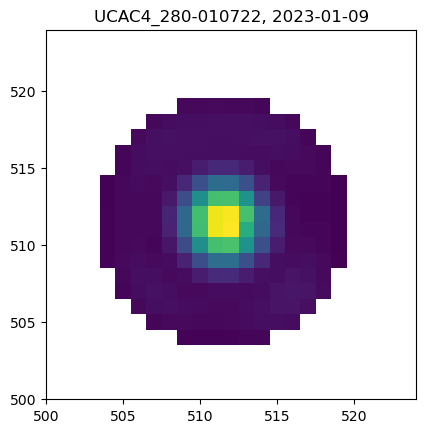

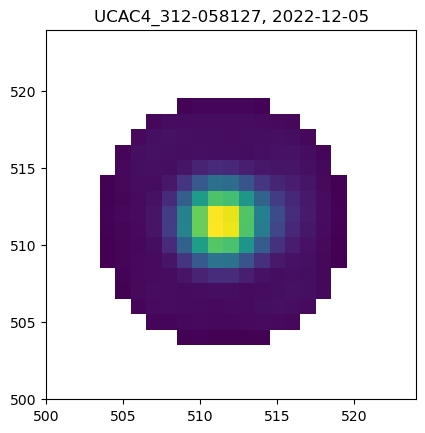

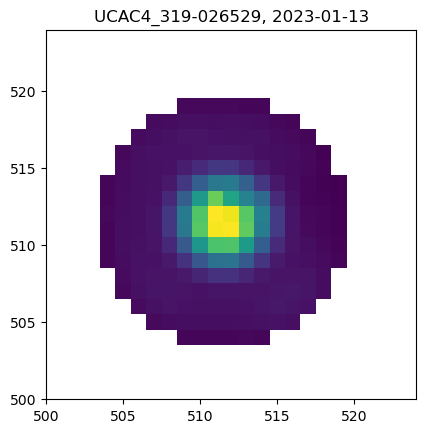

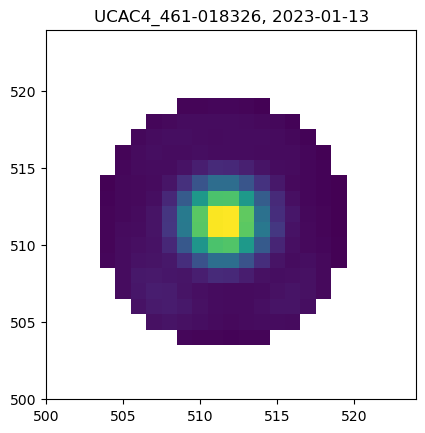

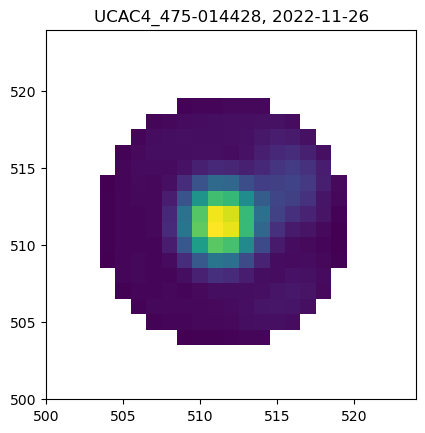

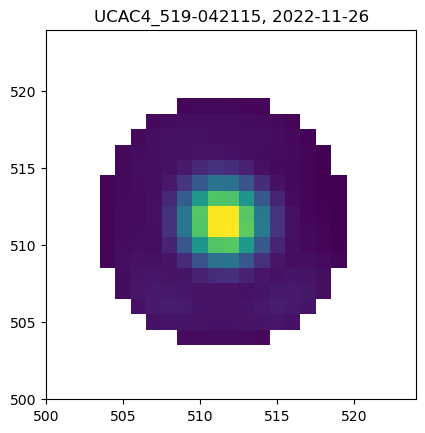

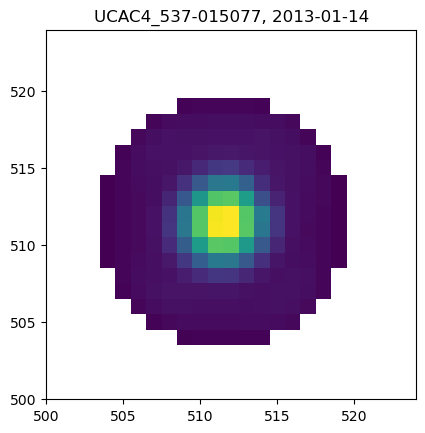

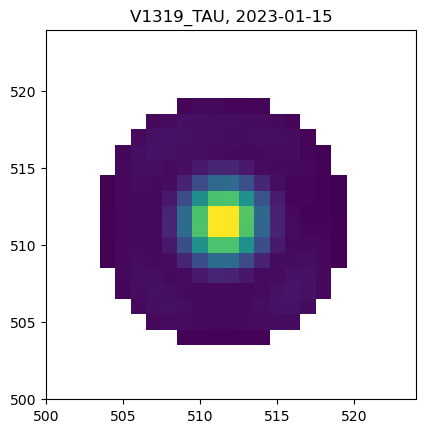

In [17]:
for i in range(len(sin_st)):
        print_stars(path_sin, i)

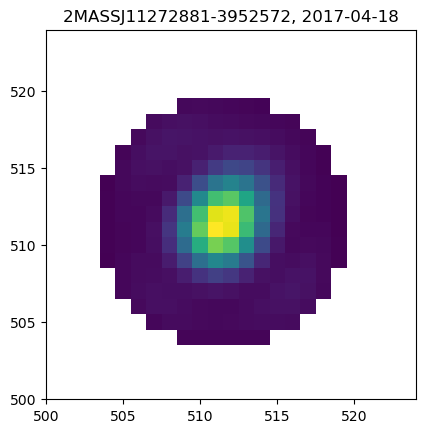

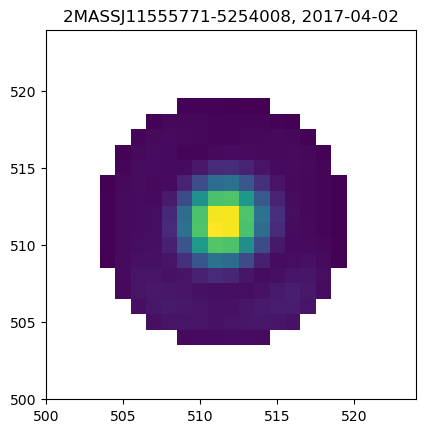

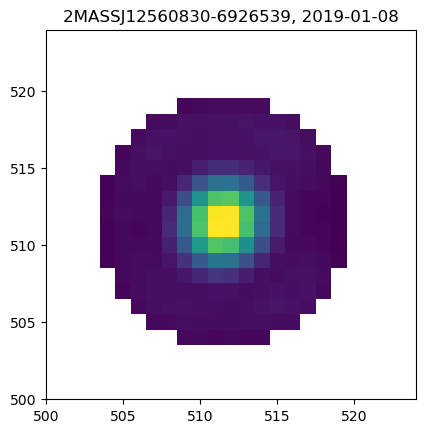

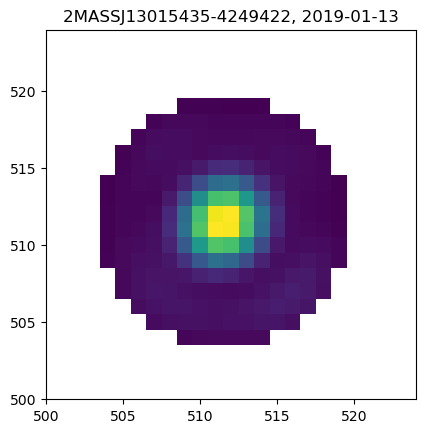

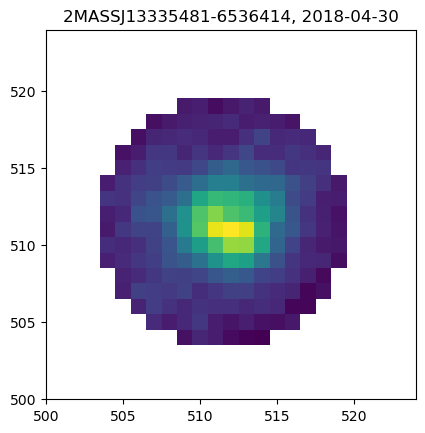

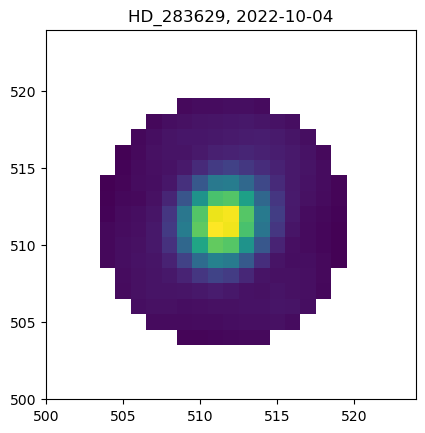

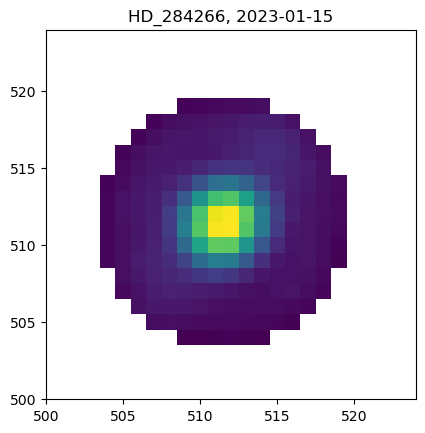

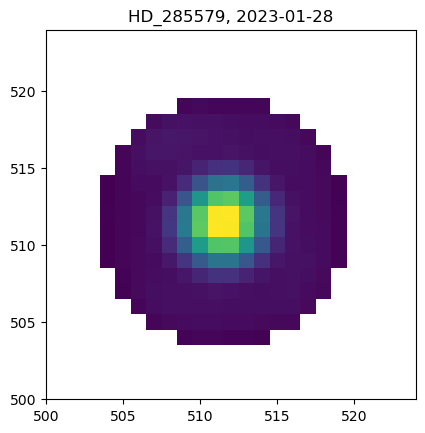

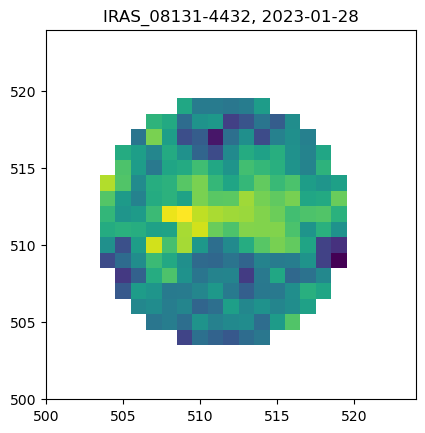

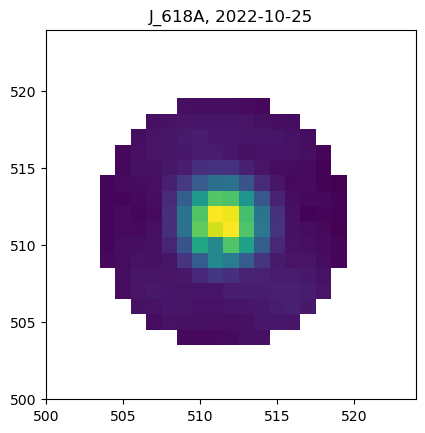

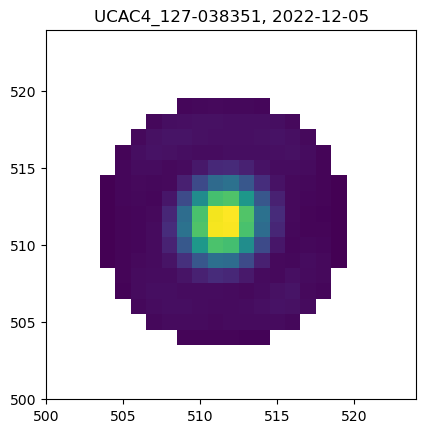

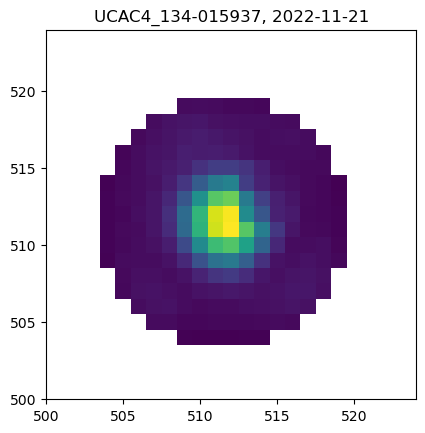

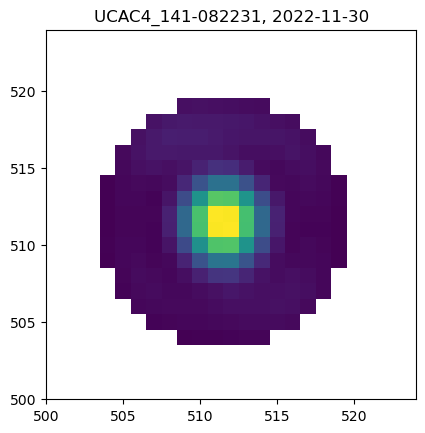

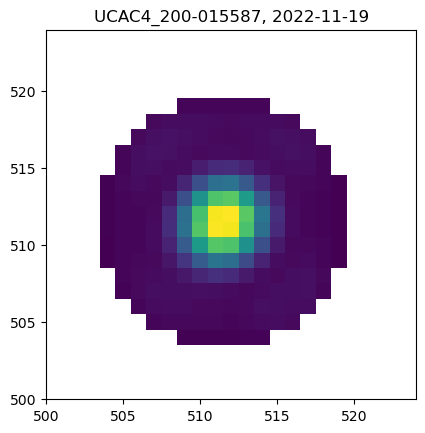

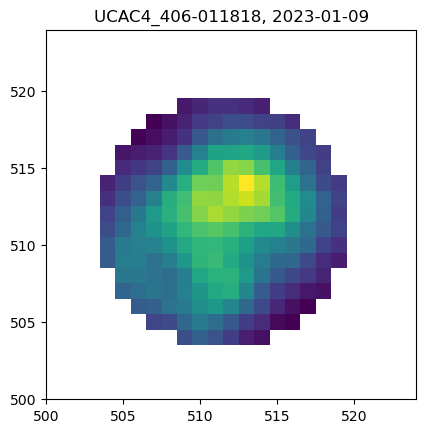

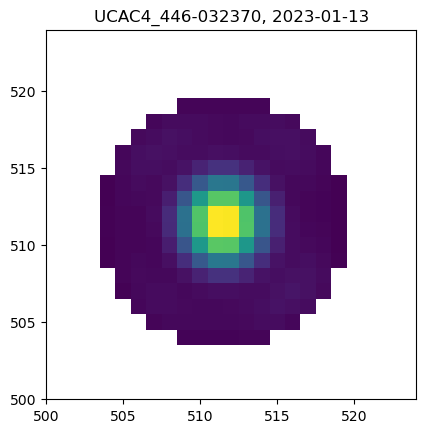

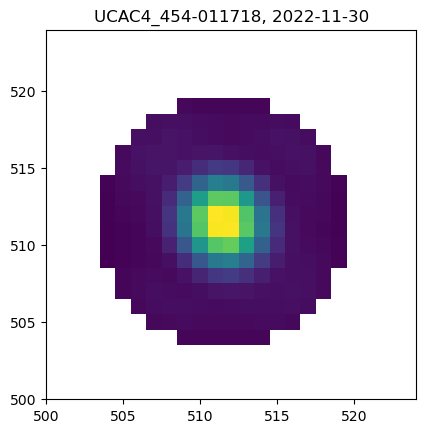

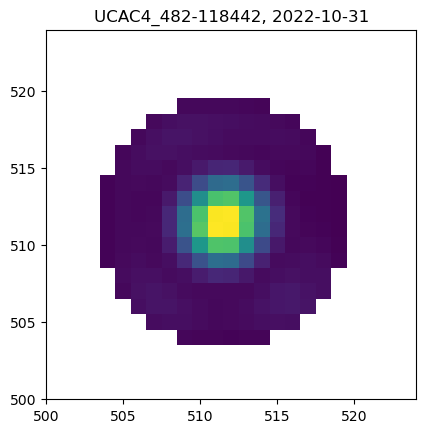

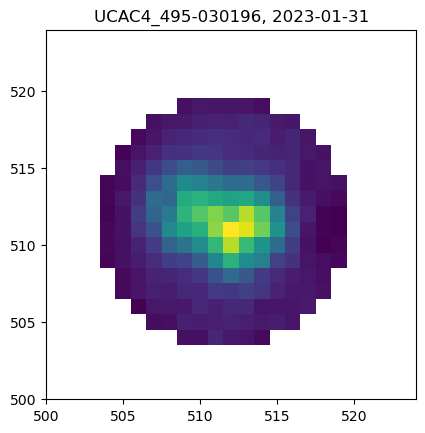

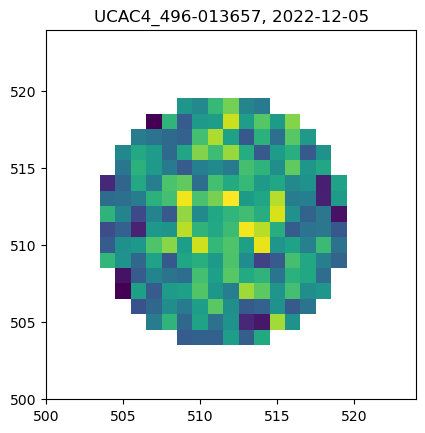

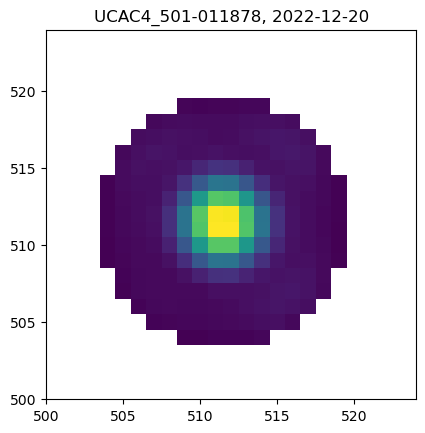

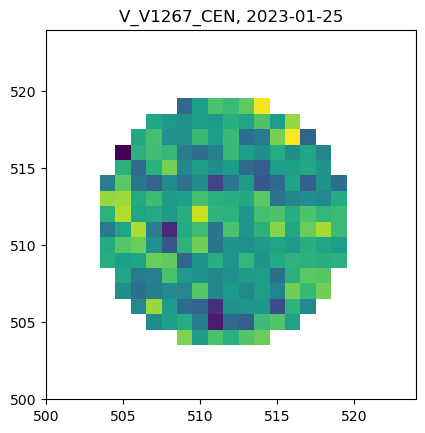

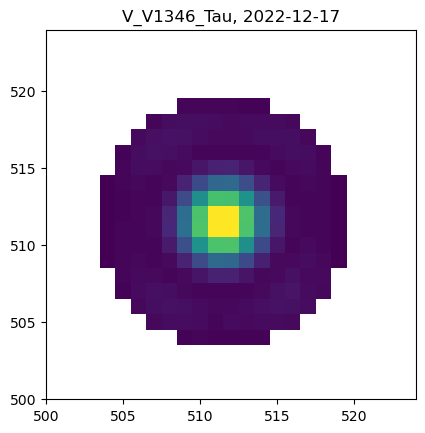

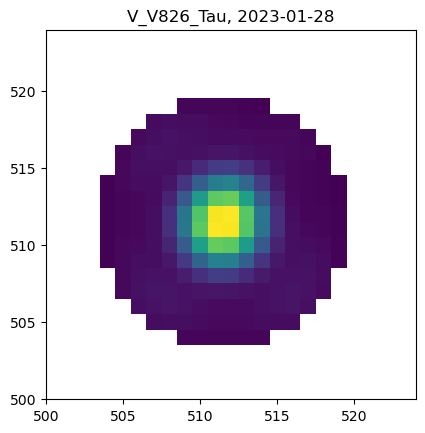

In [18]:
for i in range(len(bin_st)):
    print_stars(path_bin, i)

# 3. Add up all arrays and take the median
- Maak array met sterren erin en de waardes die daarbij horen

In [19]:
def give_star(path, idx):
    return calibration(star_data(path, idx))

In [71]:
#Only run once, it is very slow
star_arr = np.array([give_star(path_sin, 0)])
for i in range(1, len(sin_st)):
    star_arr = np.append(star_arr, np.array([give_star(path_sin, i)]), axis = 0) 

In [72]:
med_arr = np.median(star_arr, axis = 0) #gives median of the array

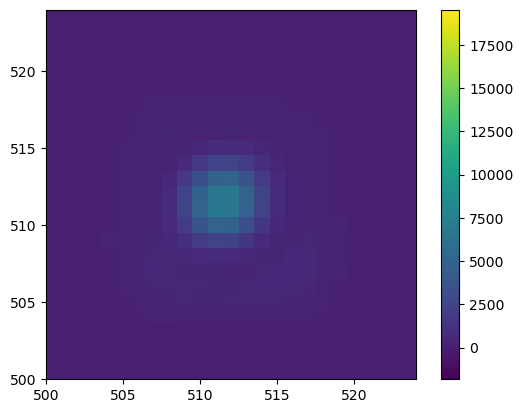

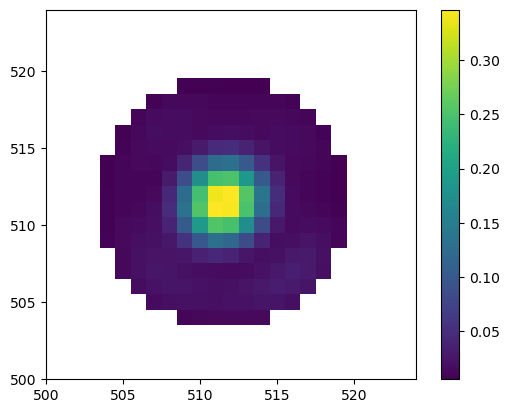

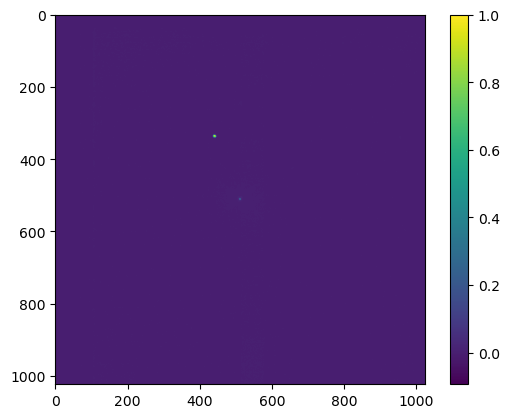

In [63]:
star4 = star_data(path_sin, 3)
star5 = calibration(star4)
star6 = normalize(star4)

plt.imshow(star4)
plt.gca().invert_yaxis()
plt.xlim(500, 524)
plt.ylim(500, 524)
plt.colorbar()
plt.show()

plt.imshow(star5)
plt.gca().invert_yaxis()
plt.xlim(500, 524)
plt.ylim(500, 524)
plt.colorbar()
plt.show()

plt.imshow(star6)
plt.gca().invert_yaxis()
#plt.xlim(500, 524)
#plt.ylim(500, 524)
plt.colorbar()
plt.show()

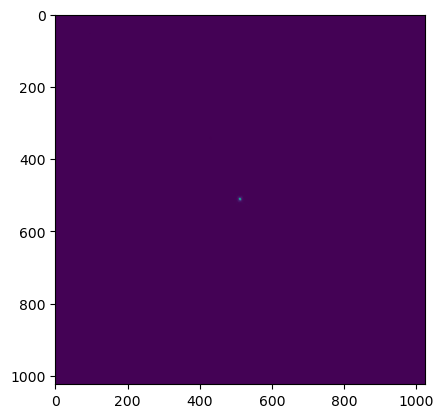

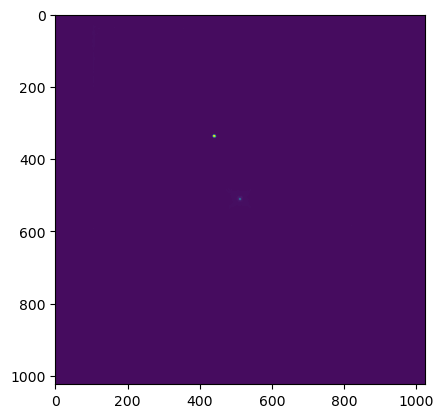

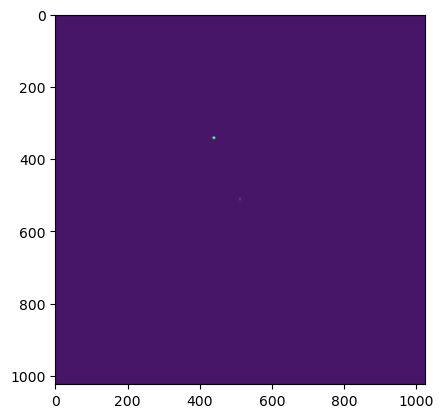

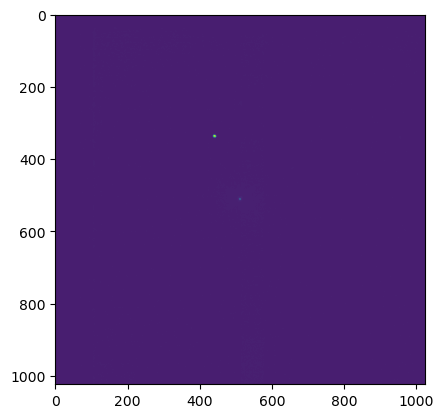

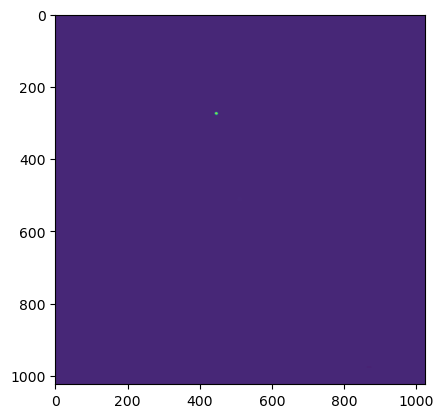

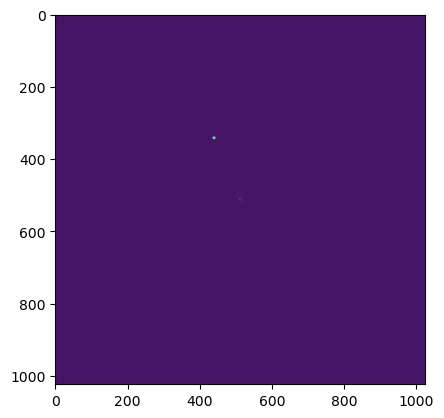

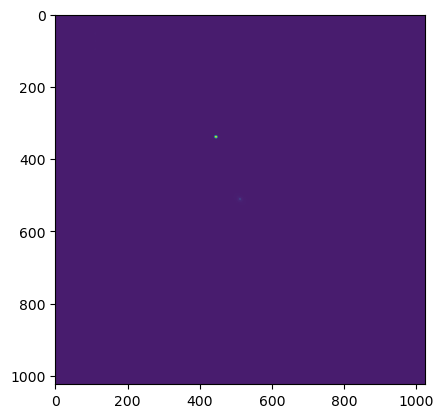

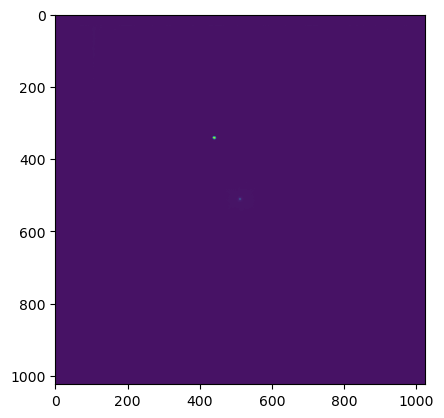

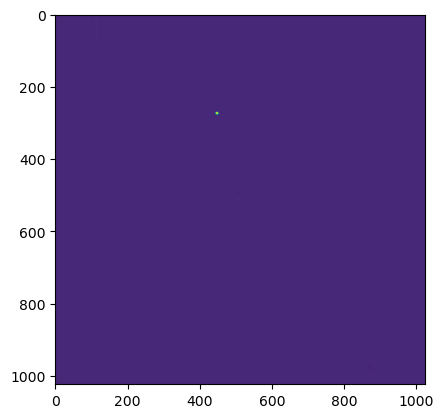

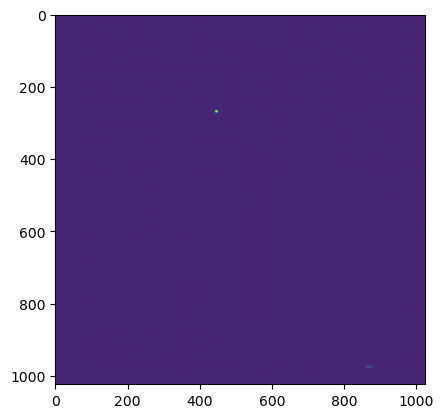

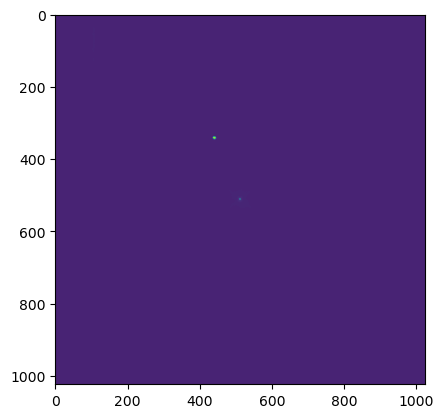

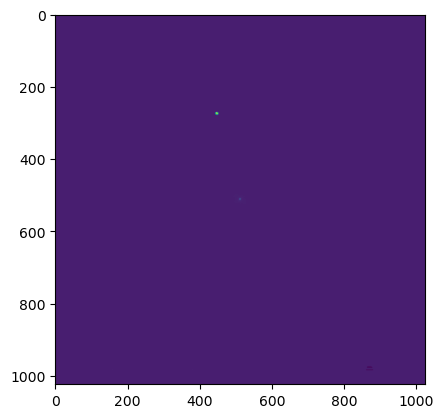

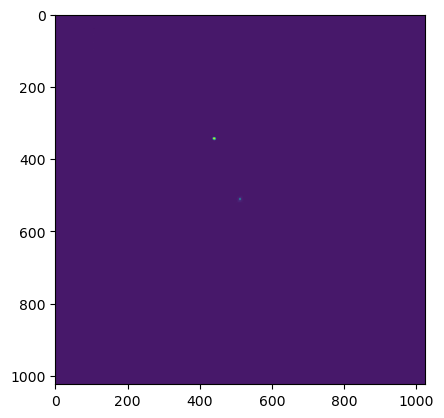

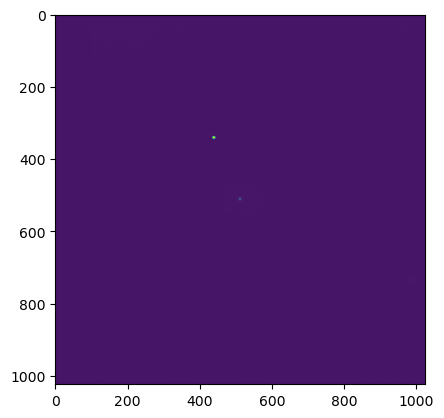

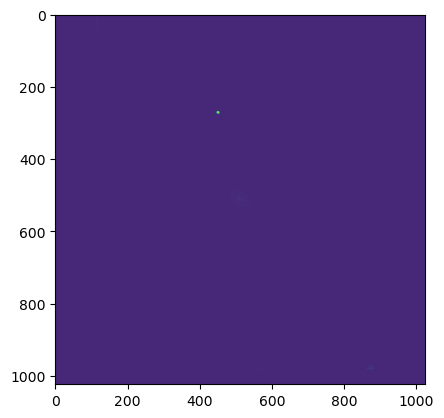

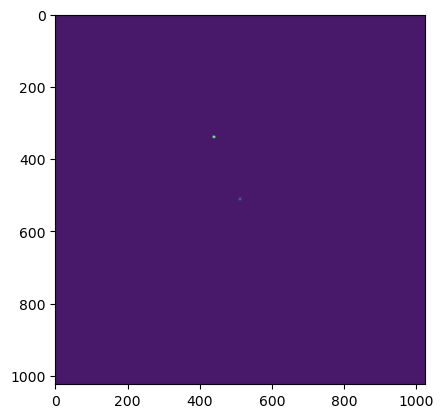

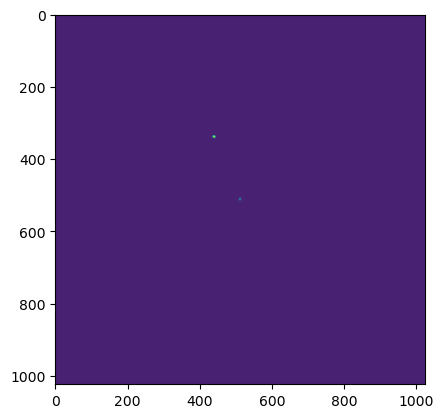

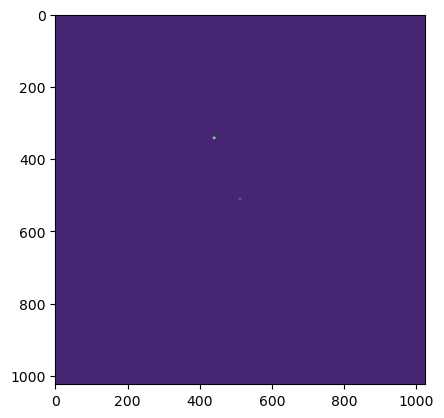

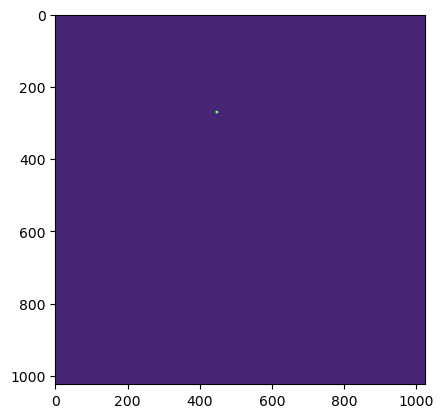

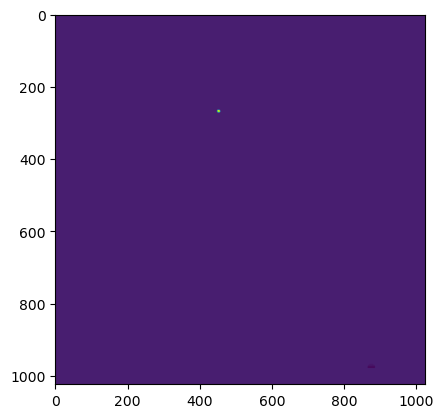

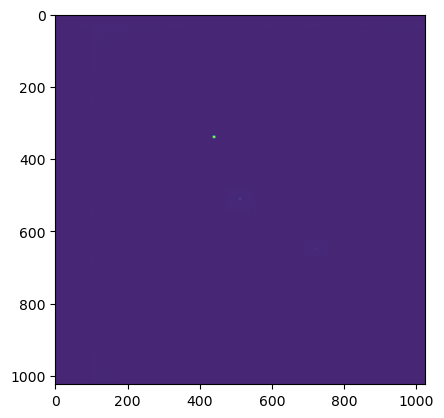

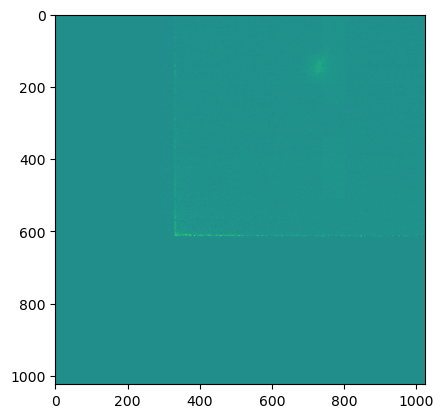

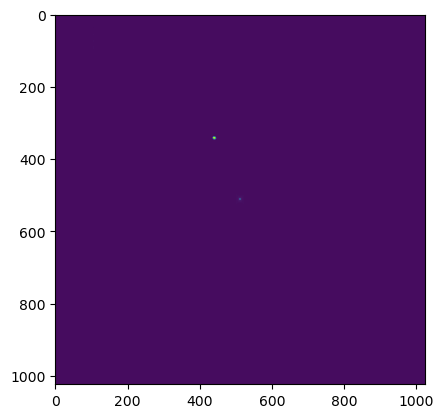

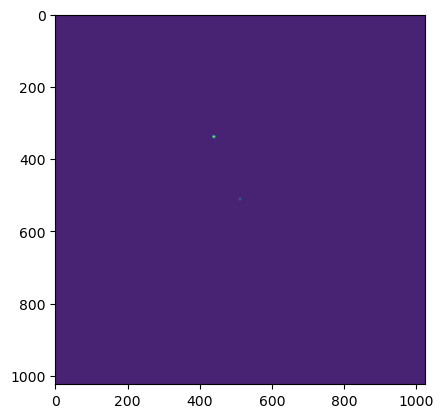

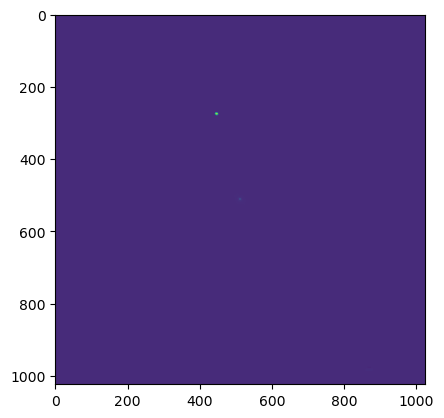

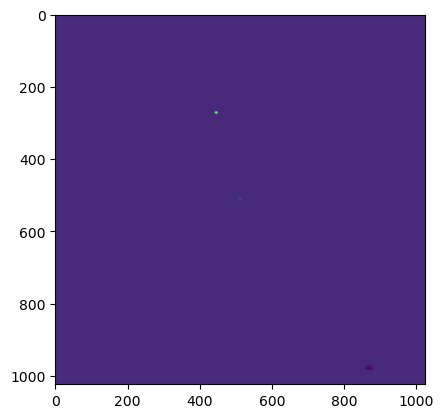

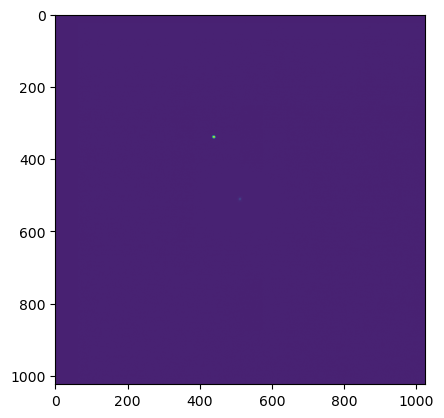

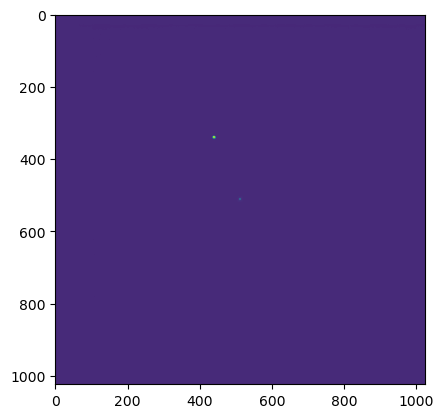

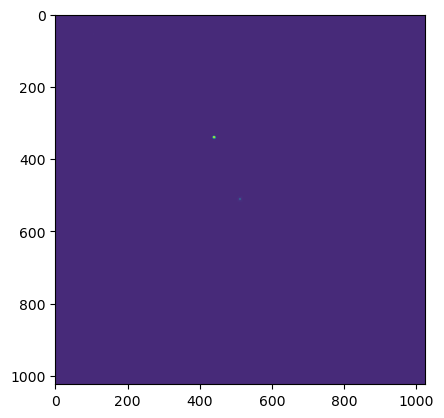

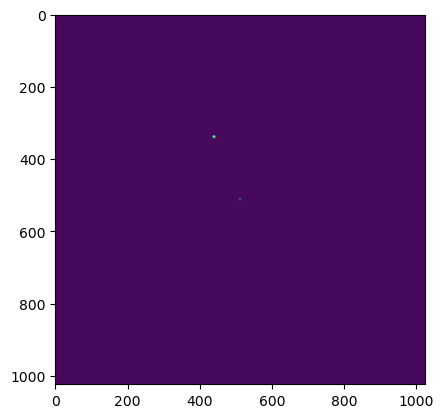

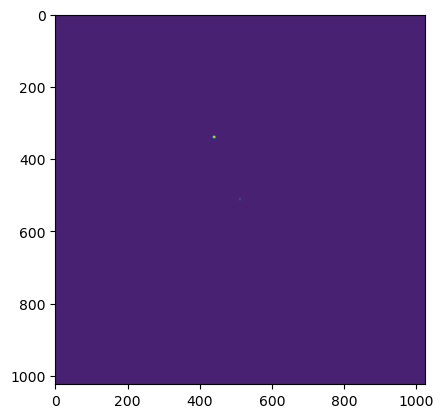

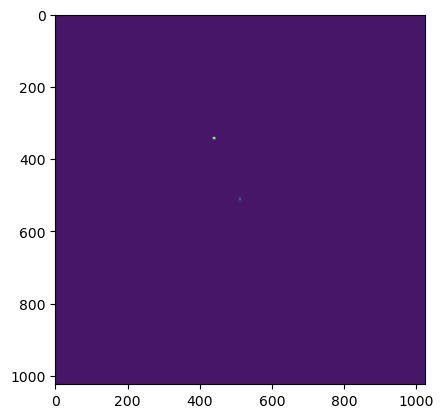

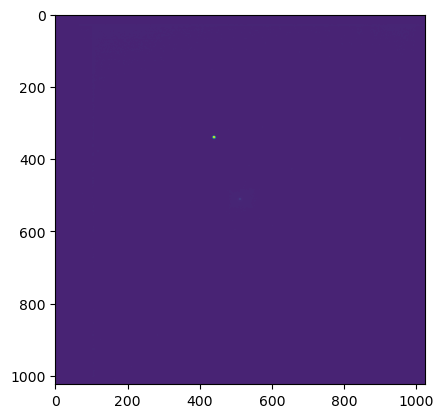

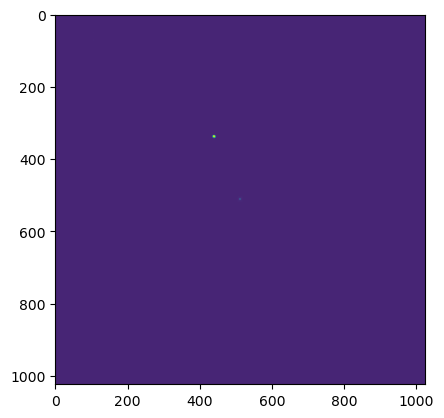

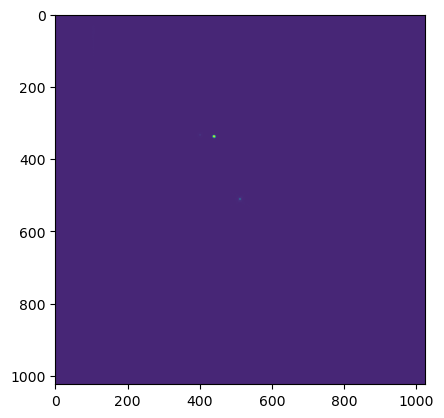

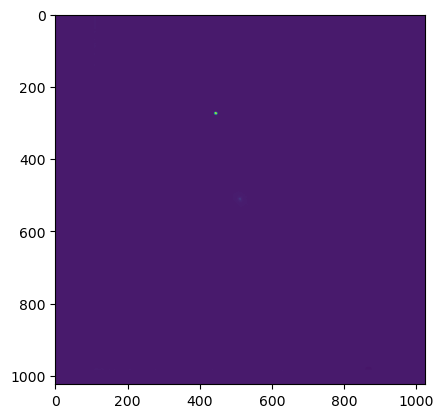

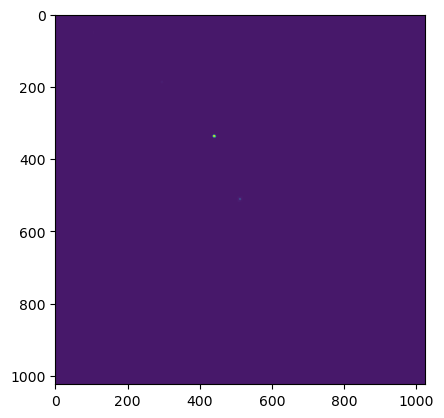

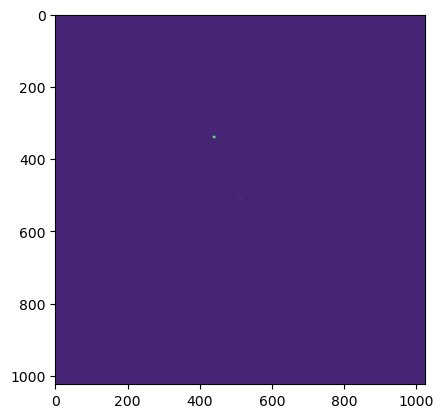

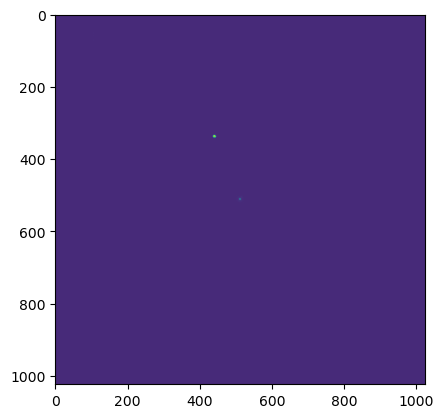

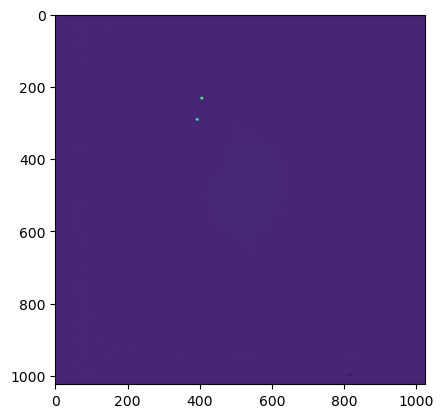

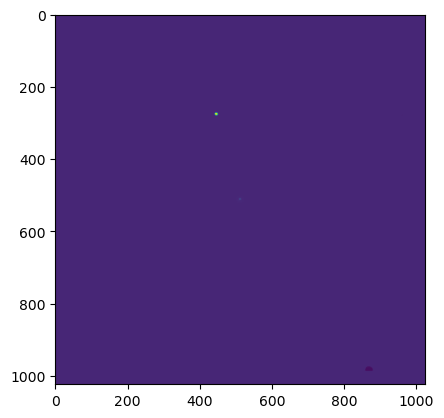

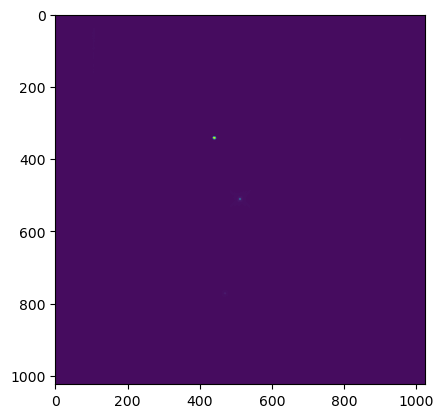

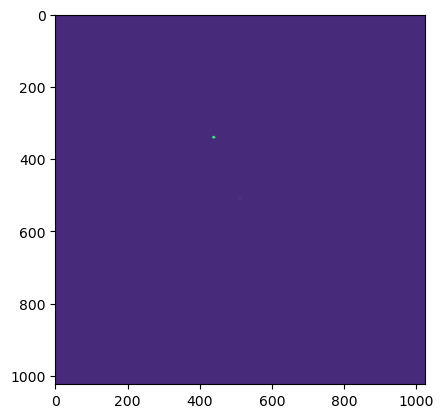

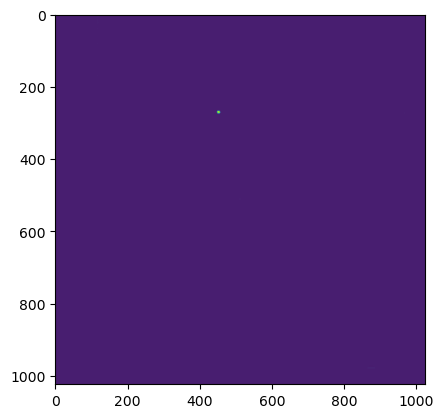

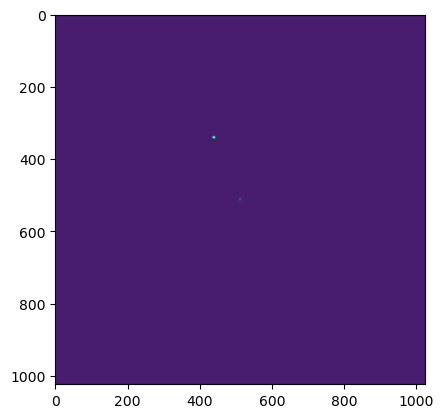

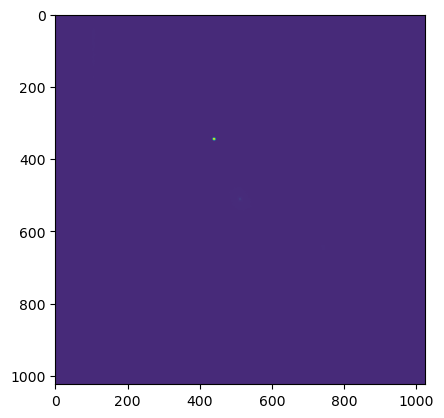

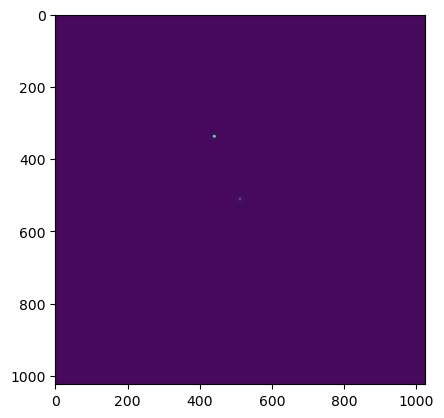

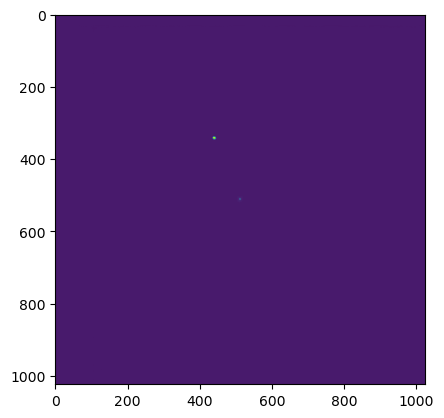

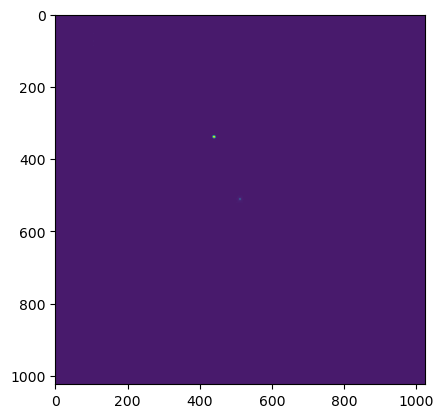

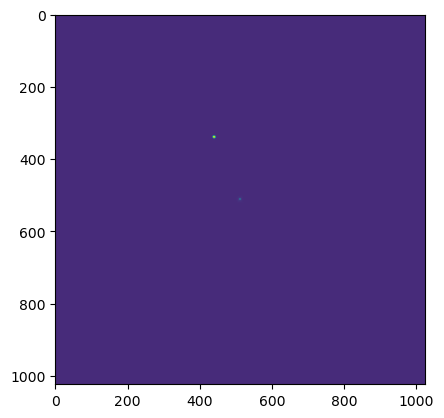

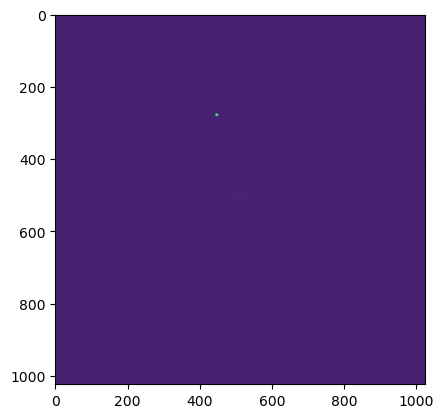

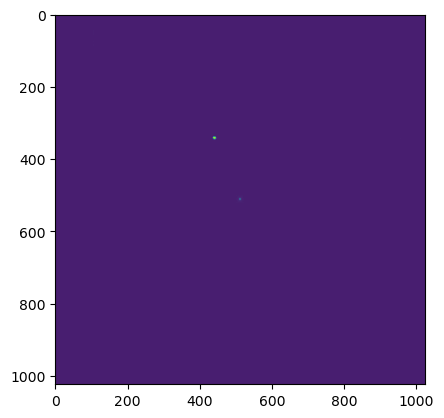

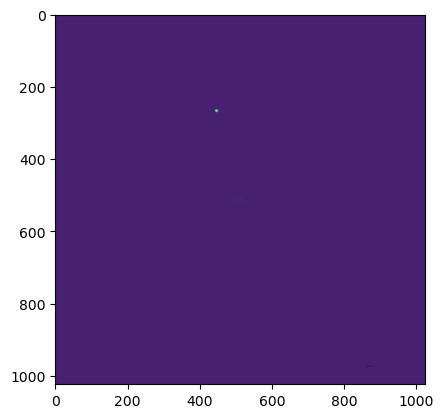

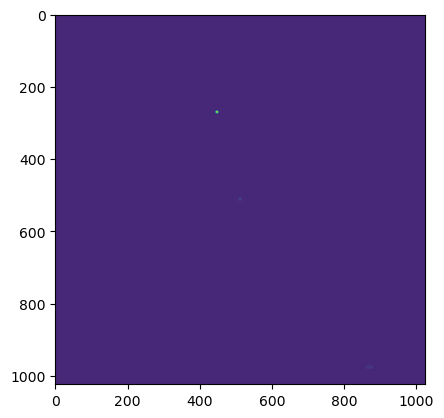

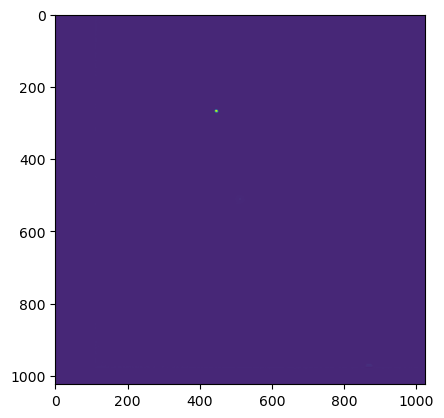

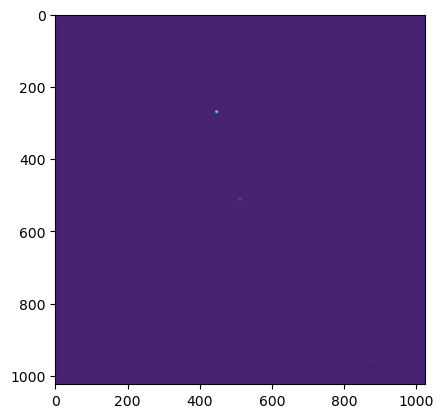

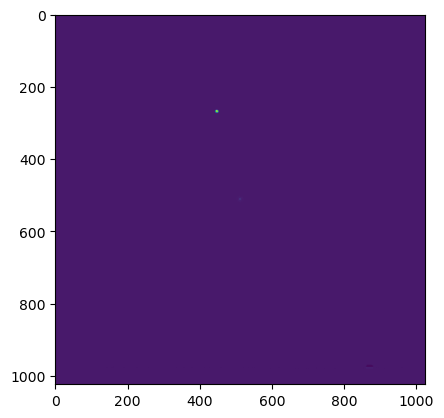

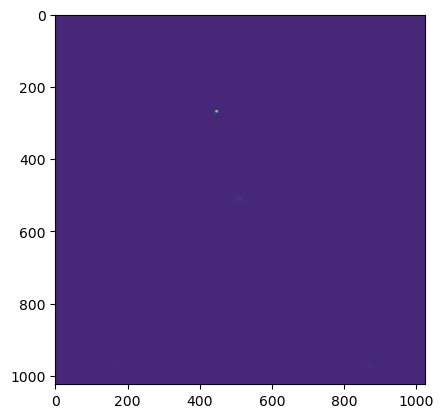

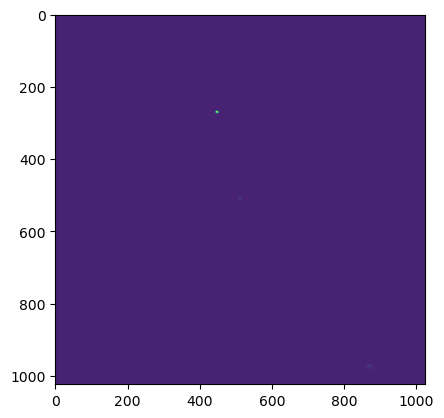

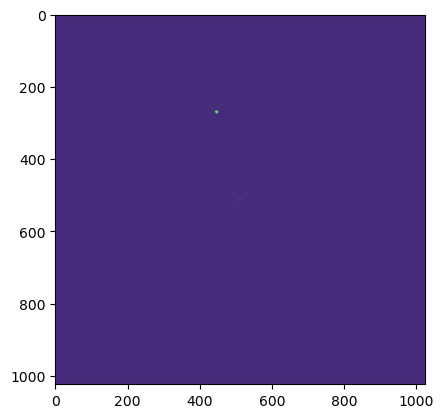

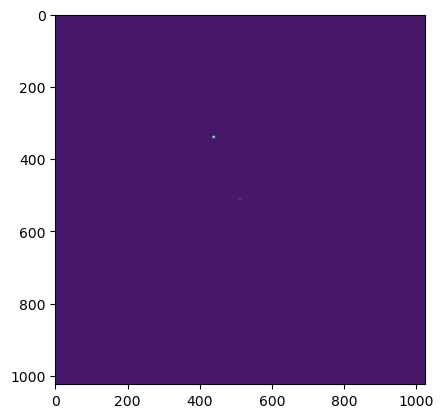

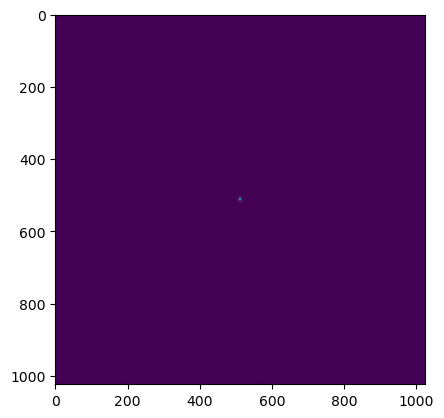

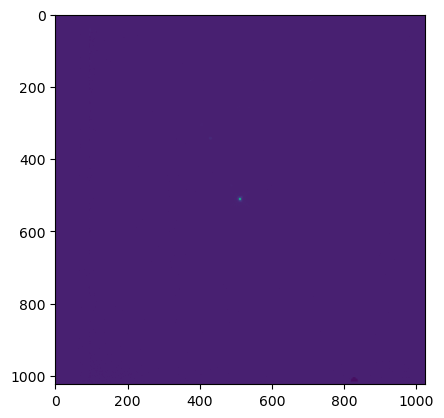

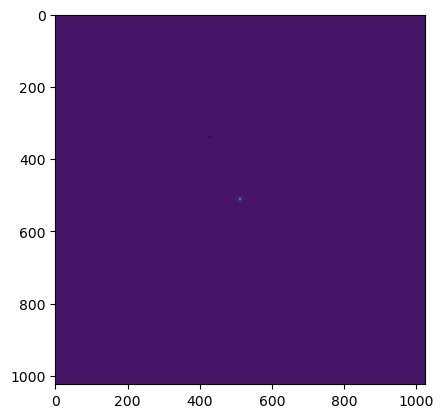

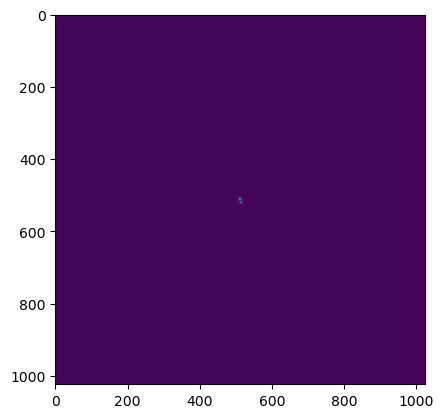

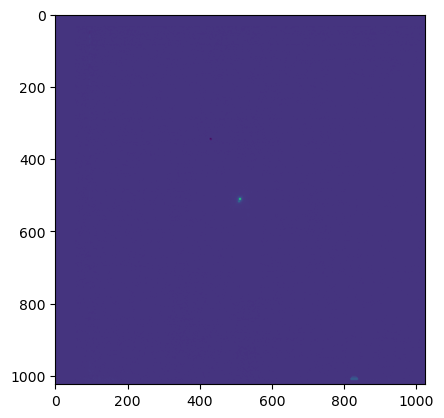

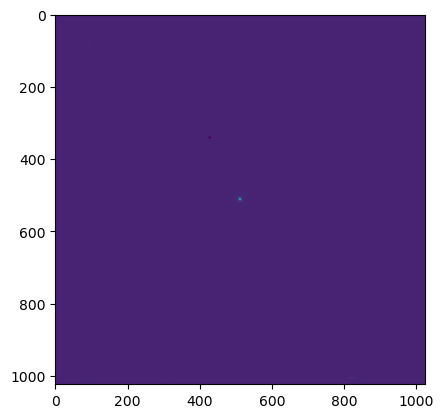

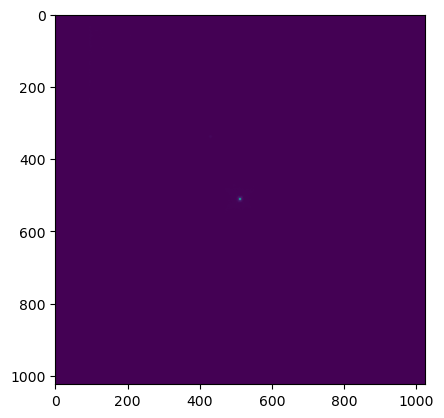

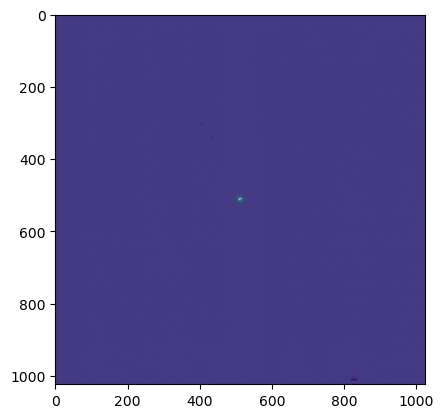

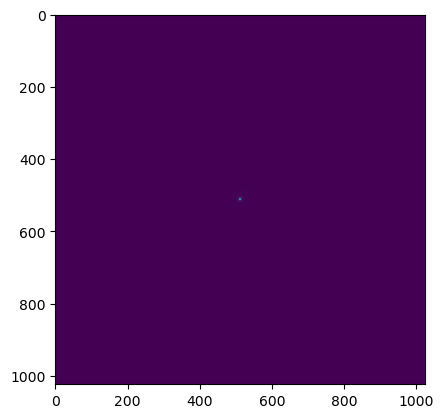

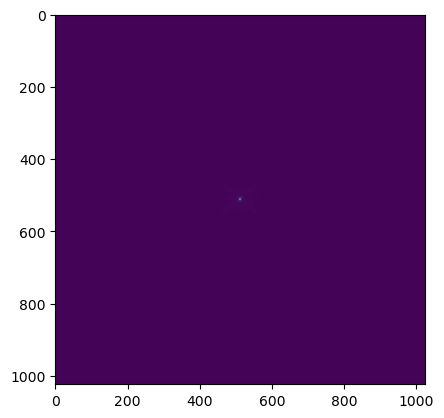

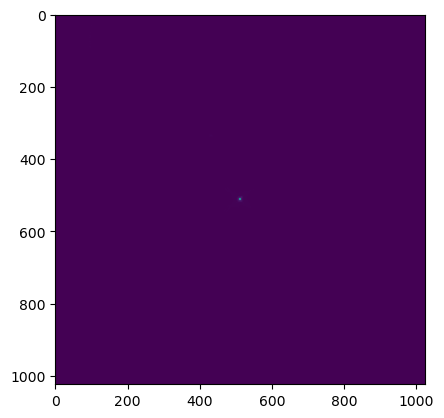

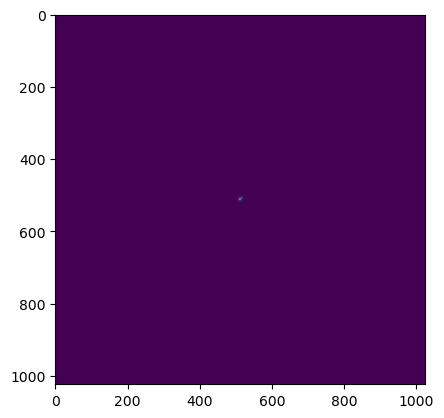

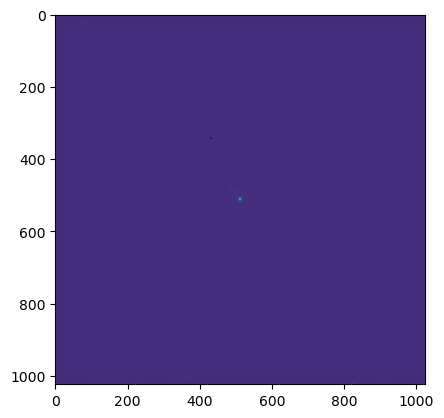

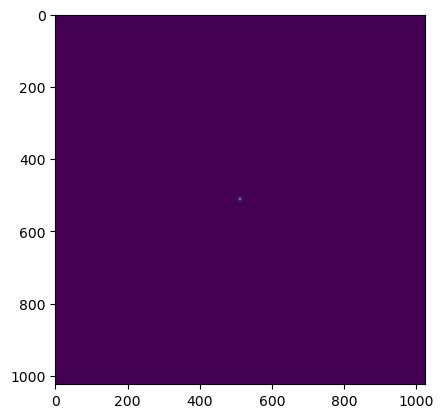

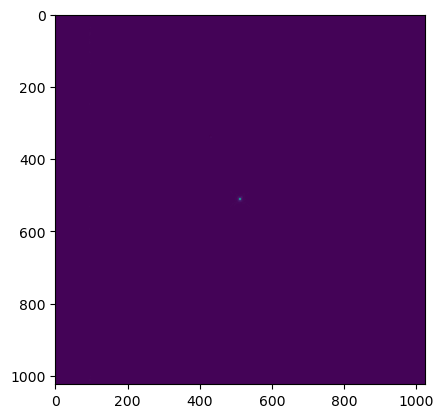

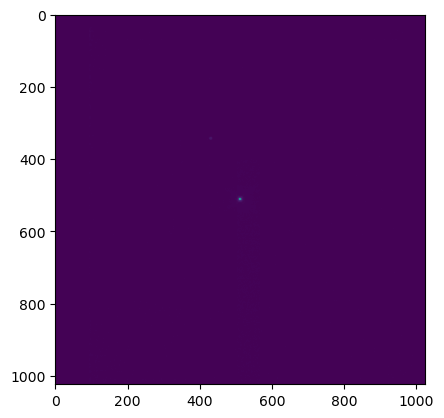

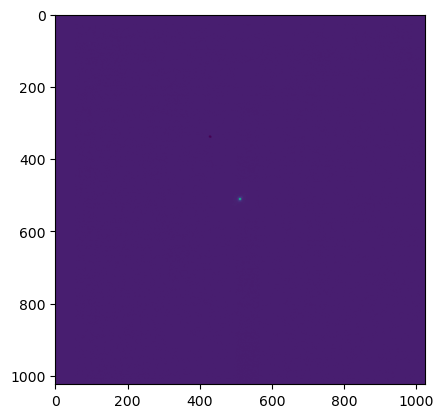

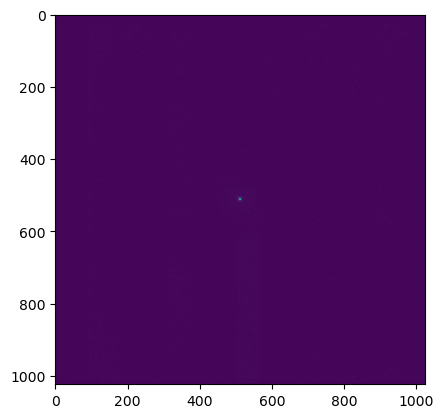

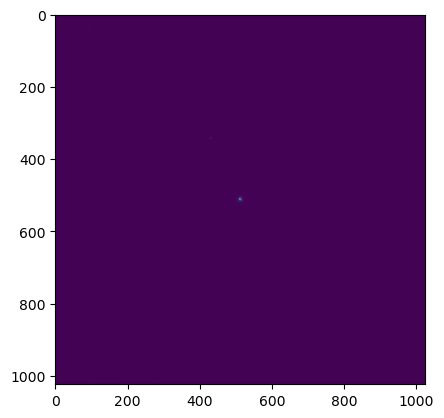

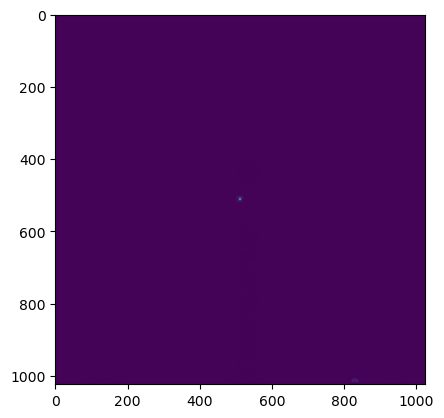

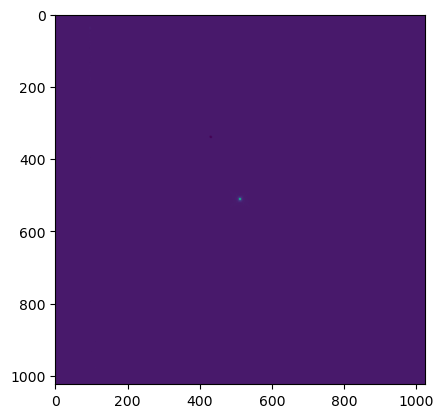

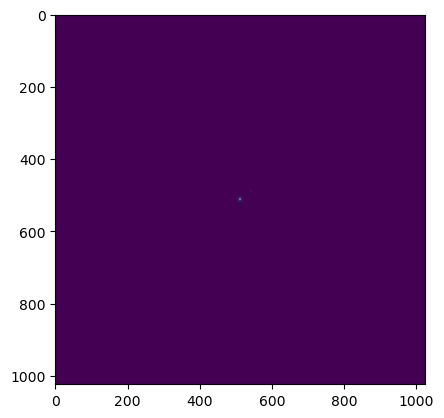

In [64]:
for i in range(len(sin_st)):
        star = star_data(path_sin, i)
        plt.imshow(star)
        plt.show()

In [57]:
def subtract_star(im, med_st):
    ''' Subtract the median star from the image and images the results'''
    im = normalize(im)
    rest = im - med_st
    plt.imshow(rest)
    plt.xlim(500, 524)
    plt.ylim(500, 524)
    plt.show()

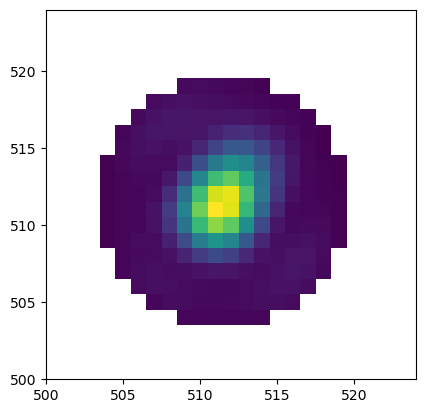

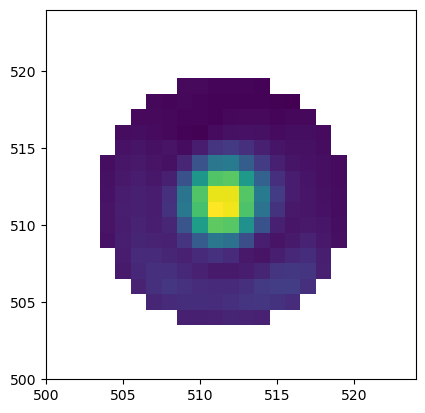

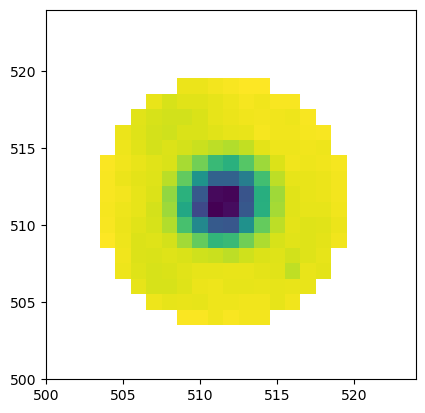

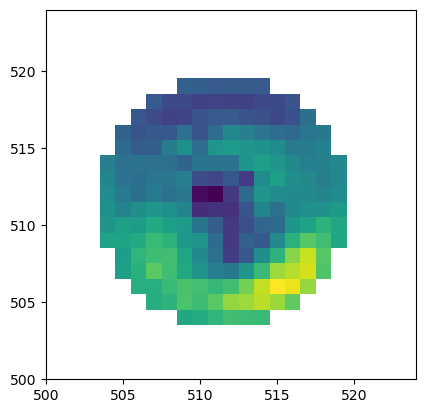

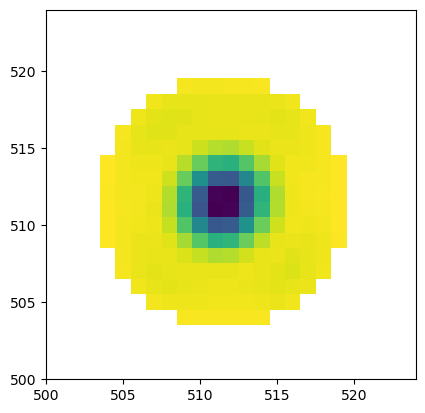

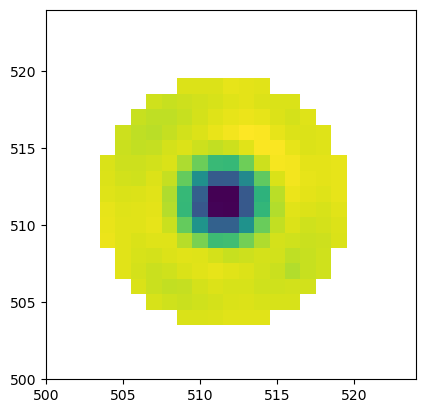

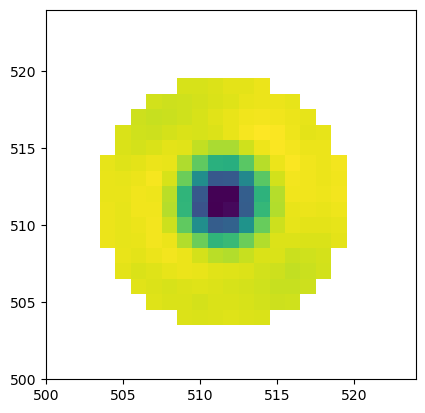

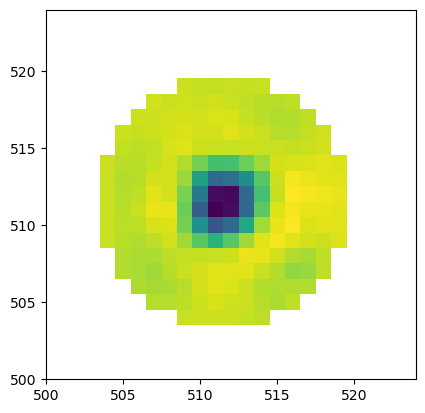

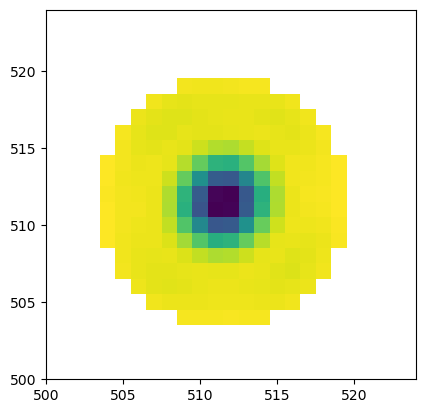

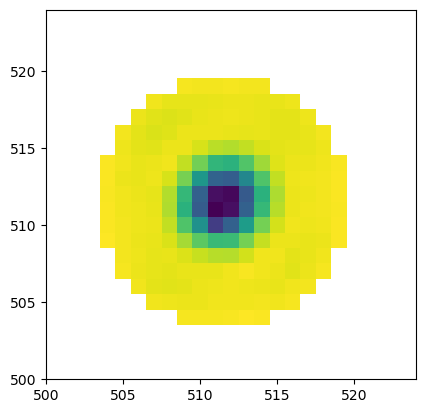

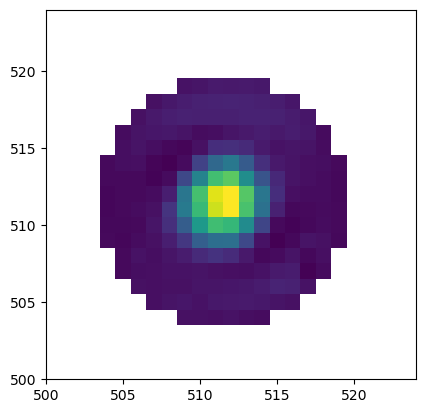

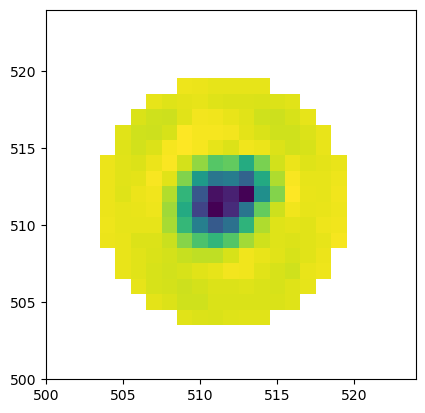

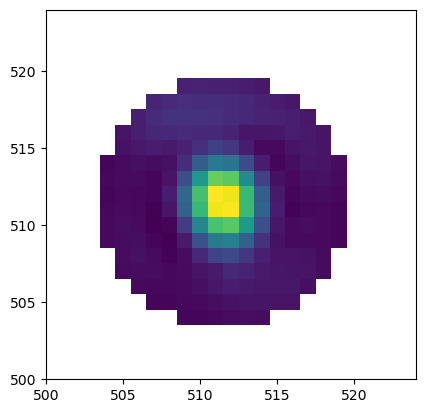

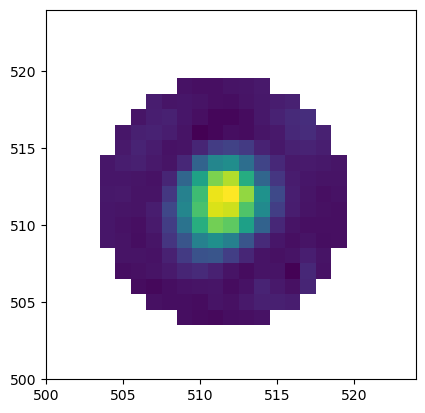

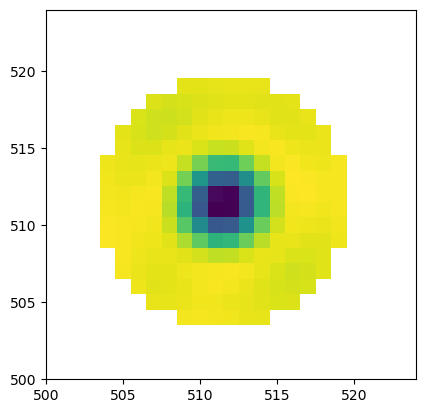

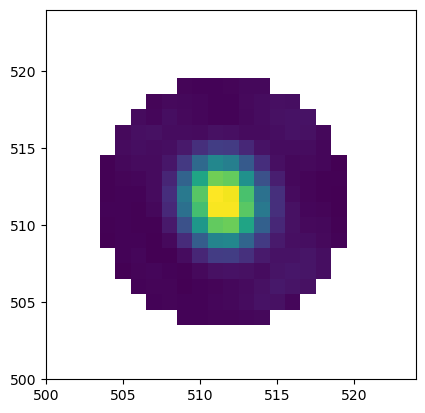

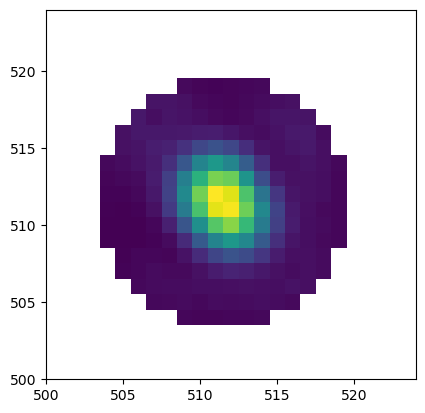

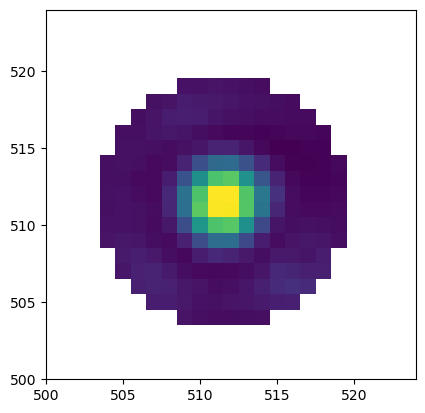

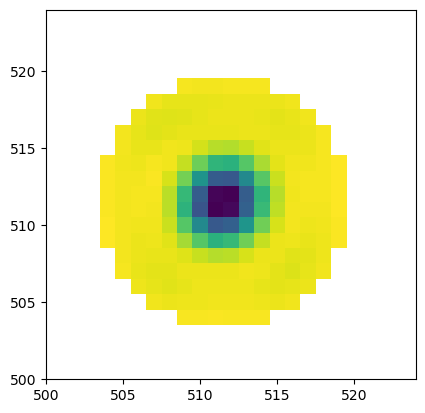

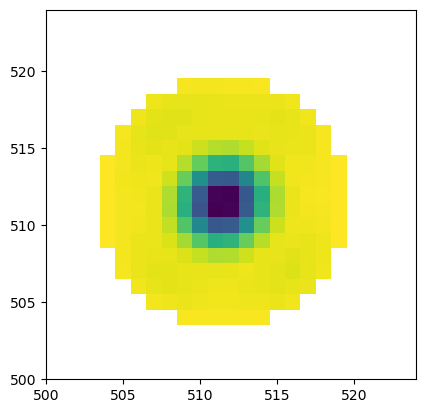

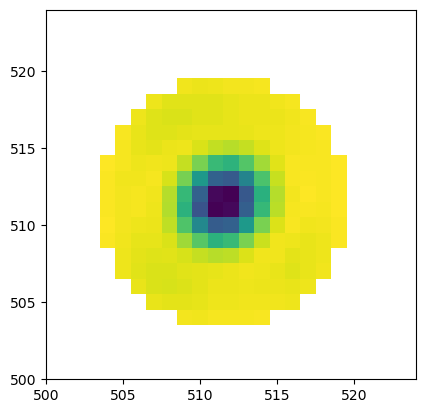

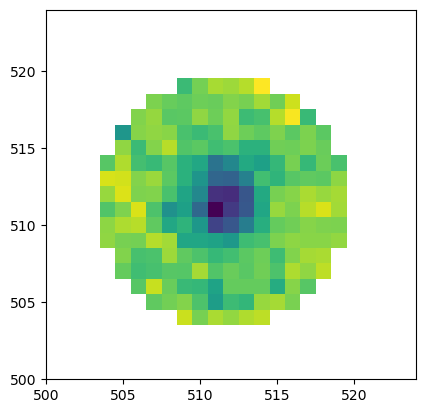

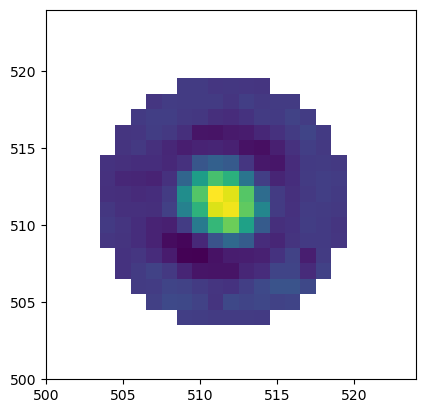

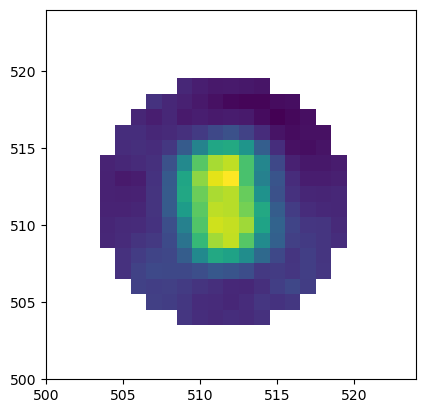

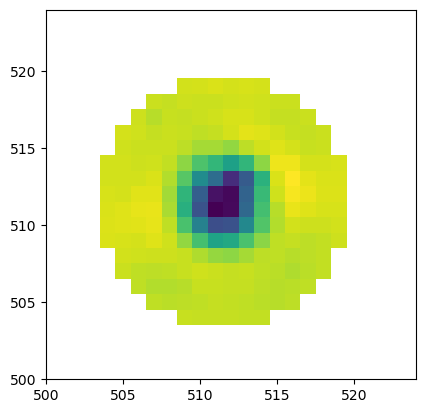

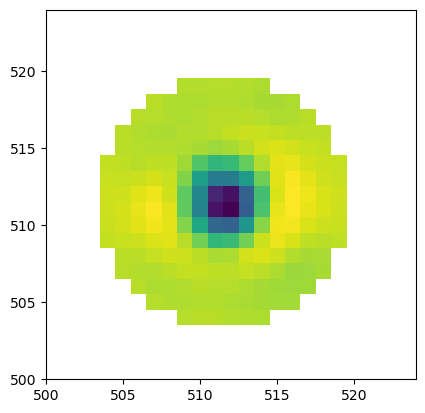

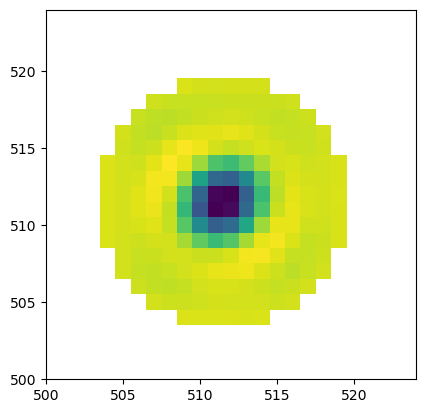

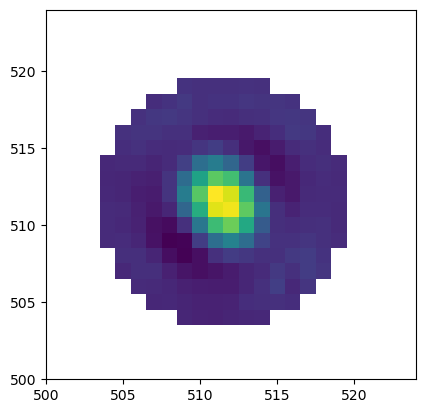

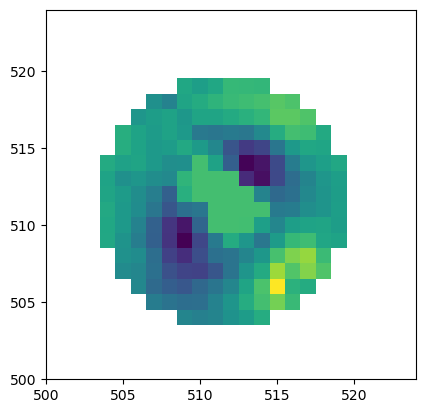

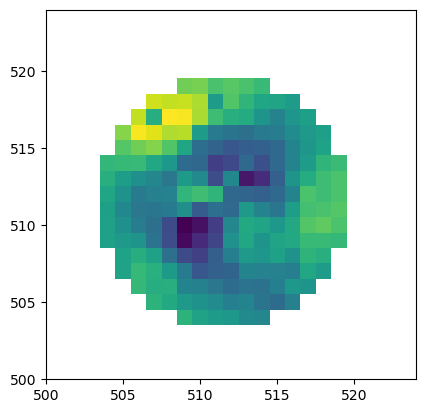

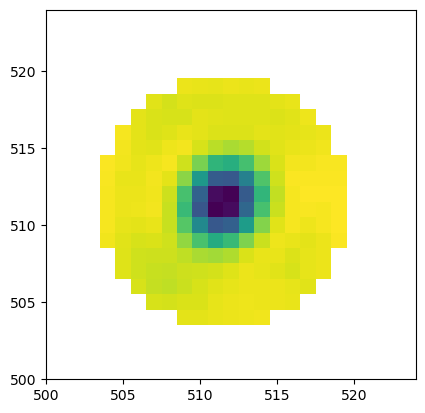

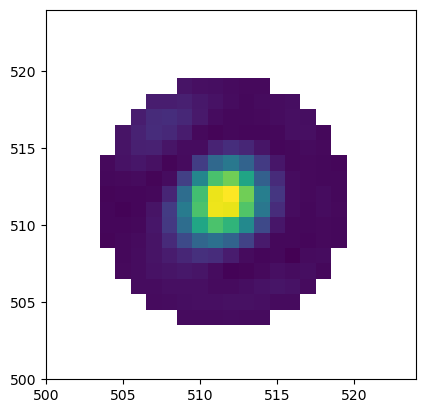

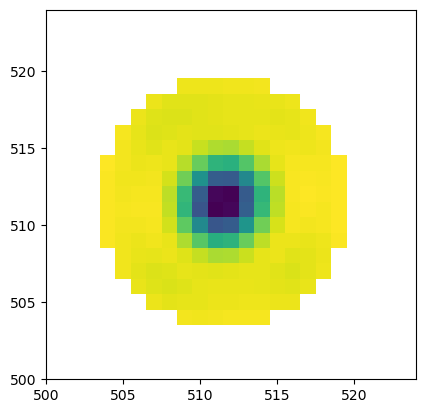

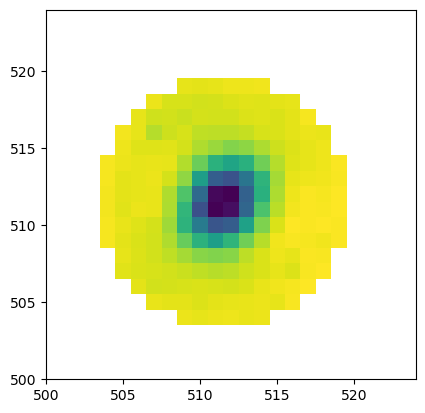

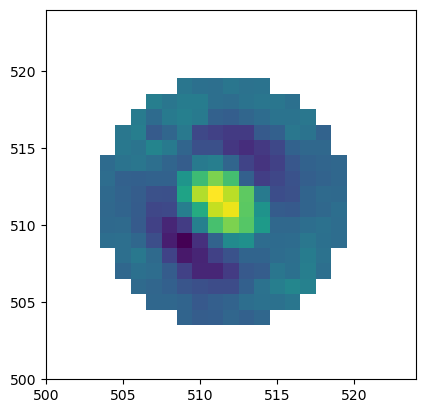

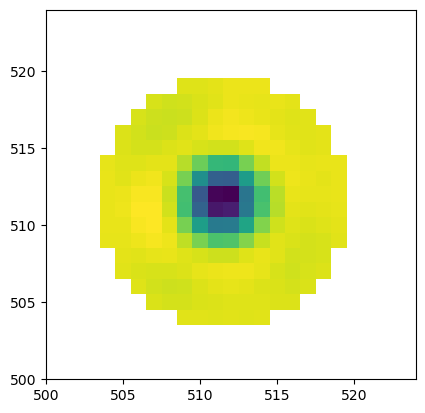

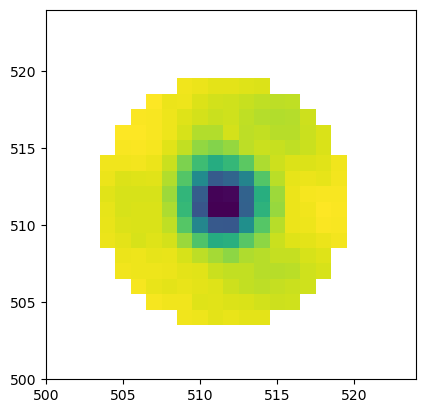

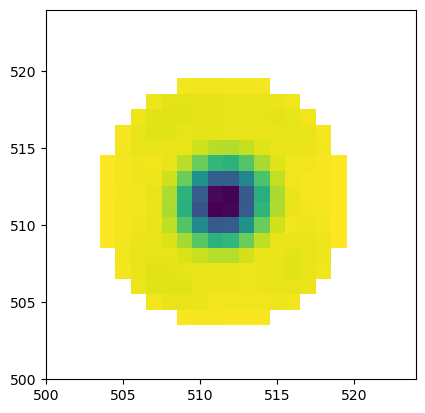

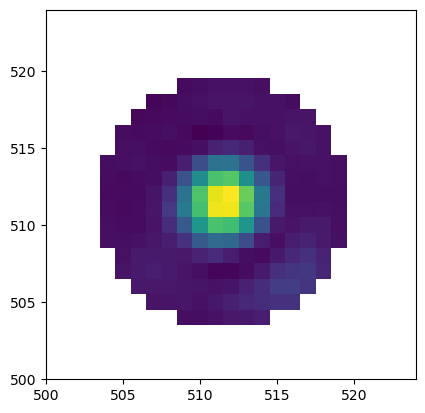

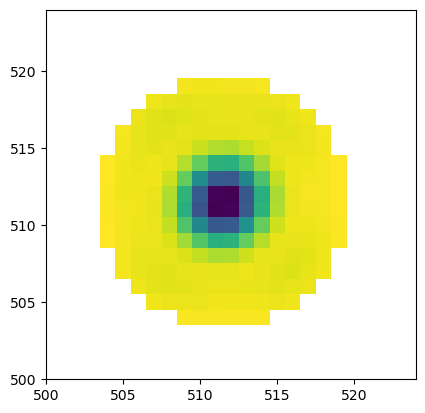

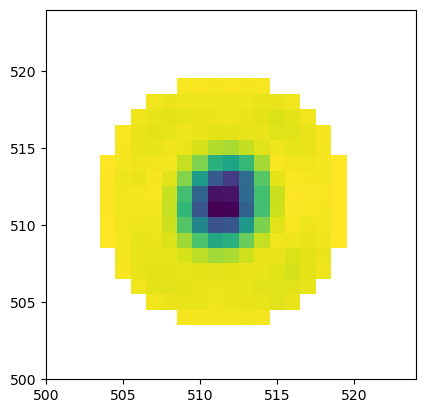

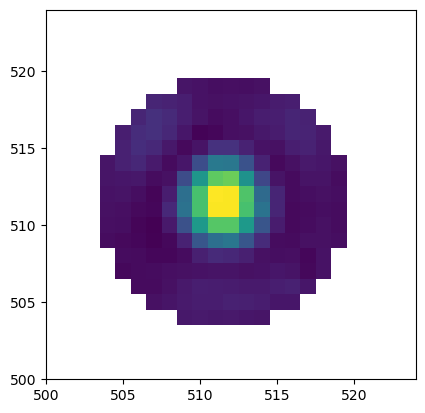

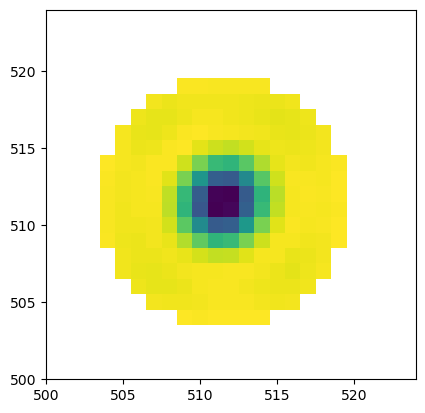

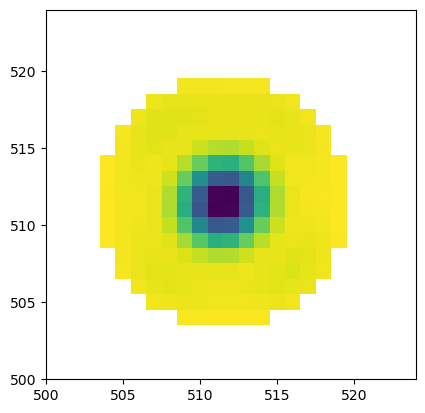

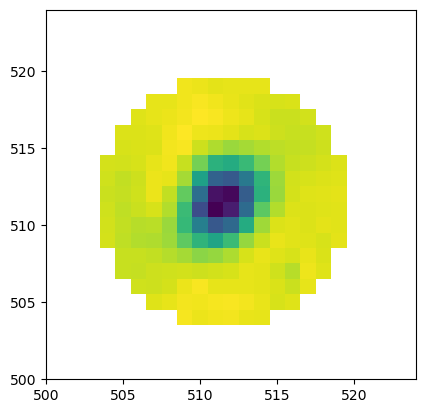

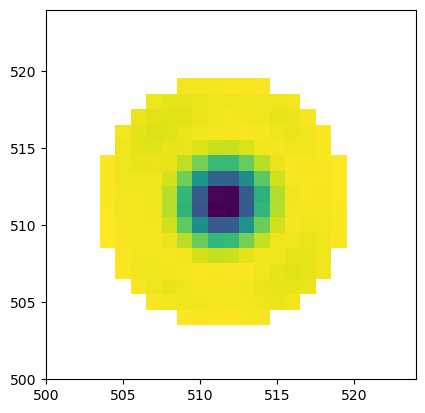

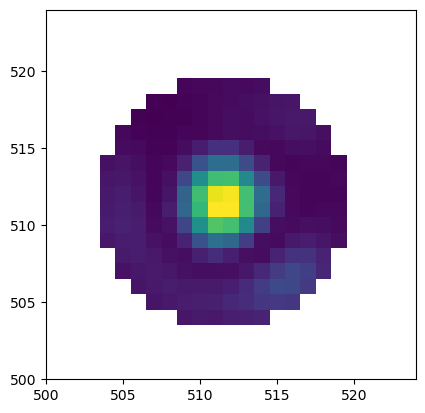

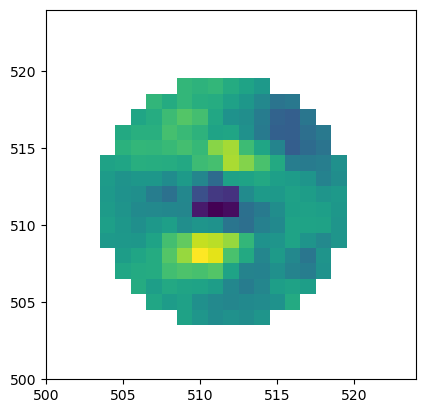

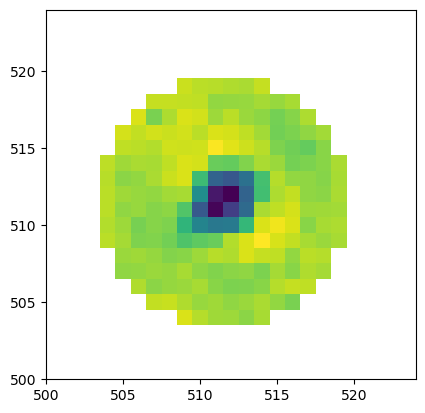

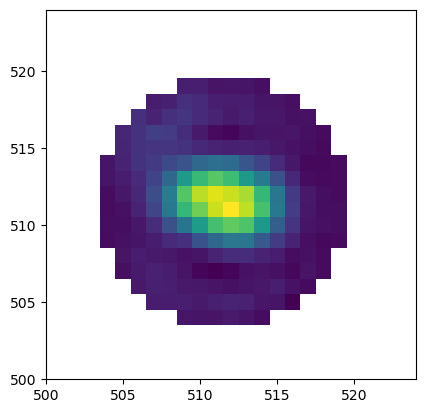

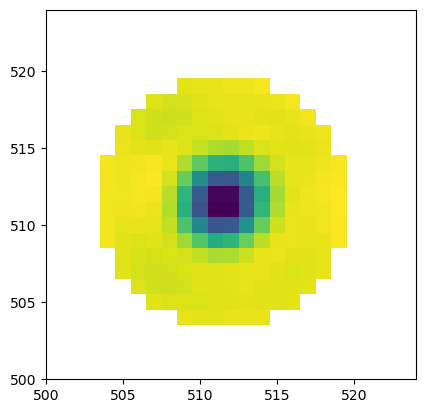

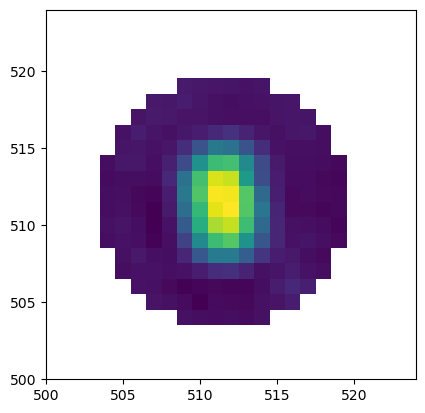

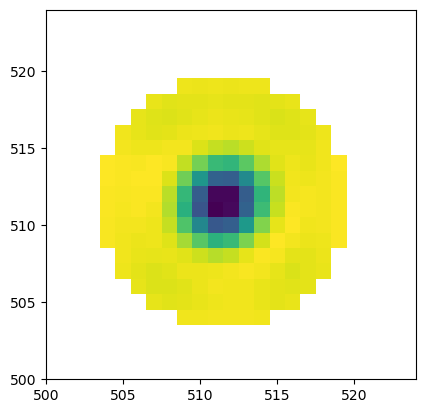

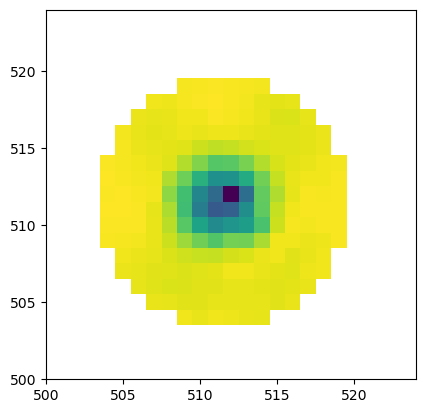

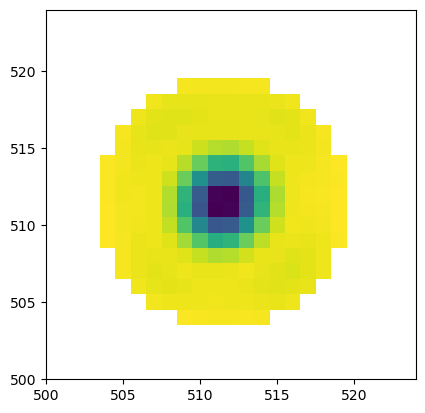

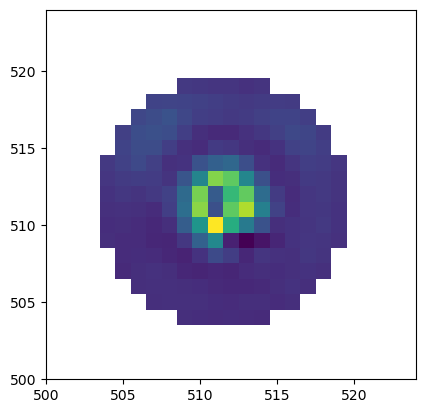

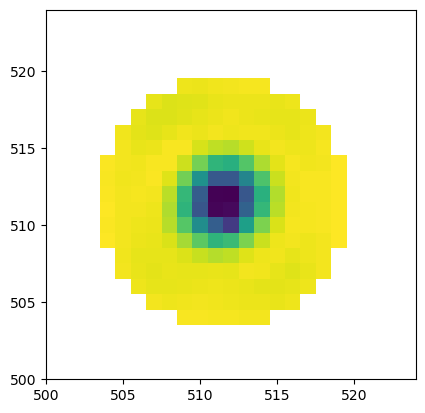

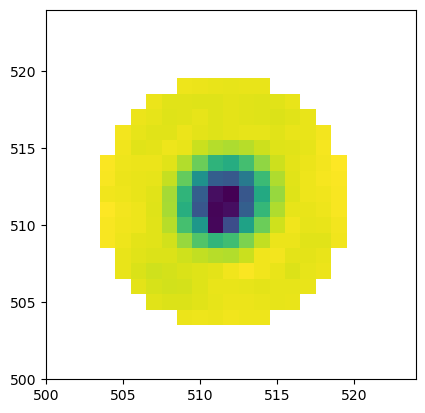

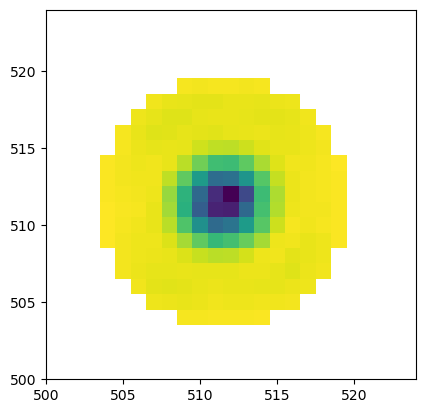

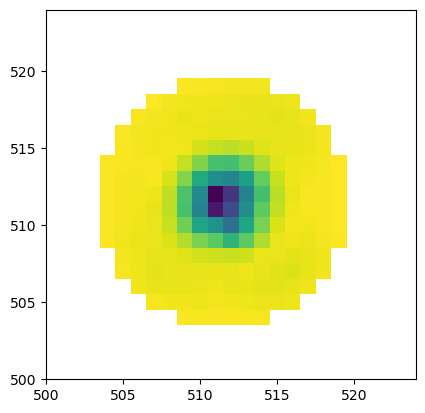

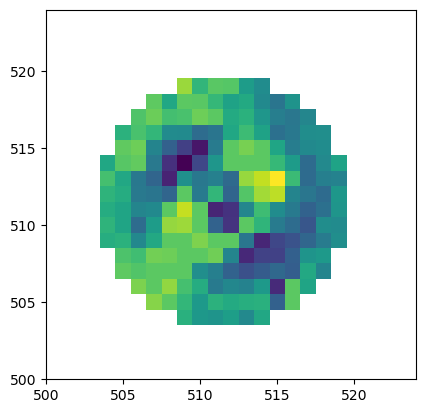

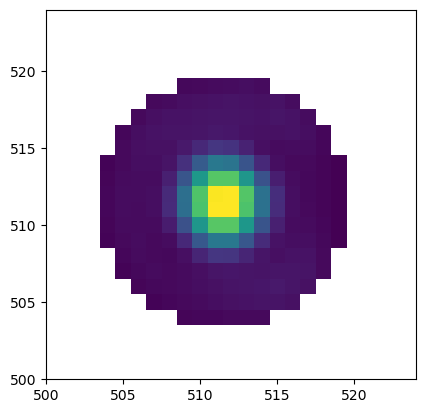

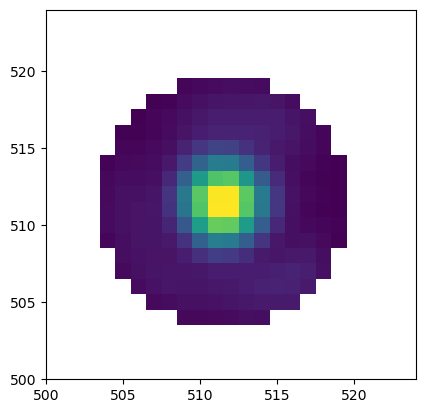

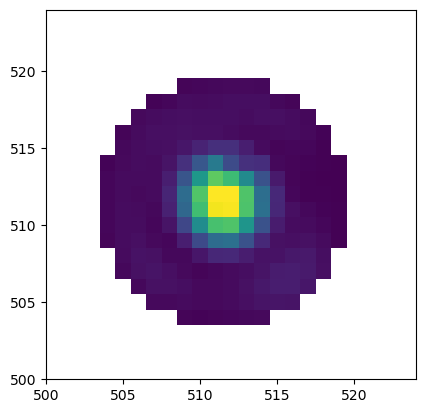

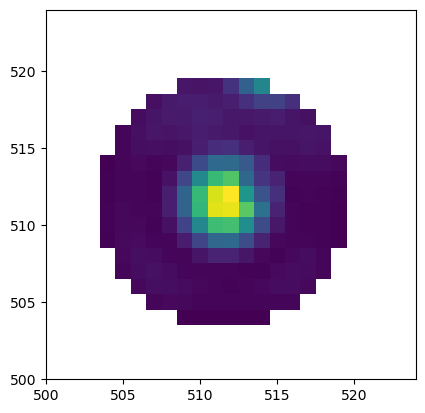

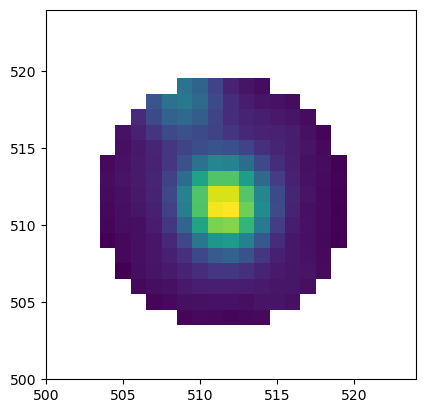

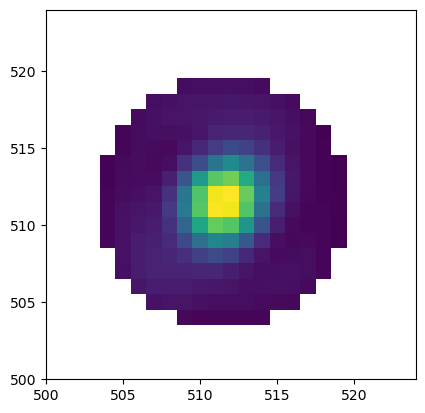

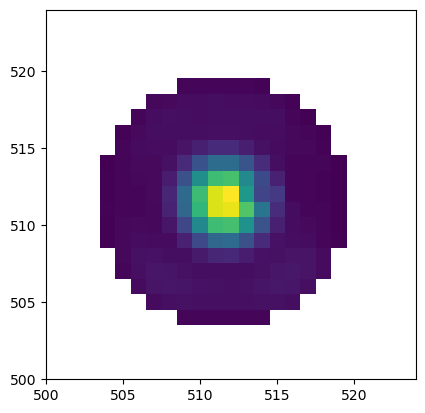

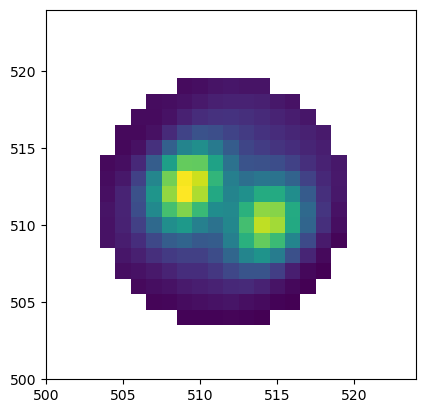

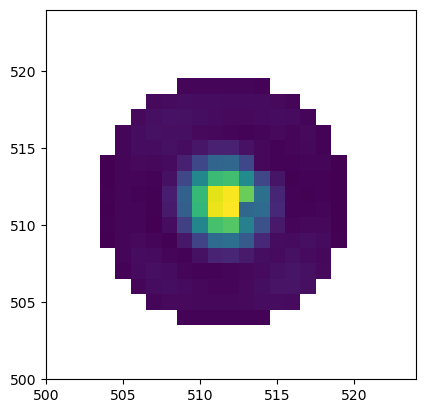

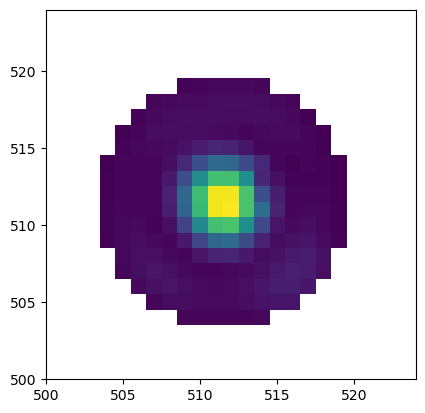

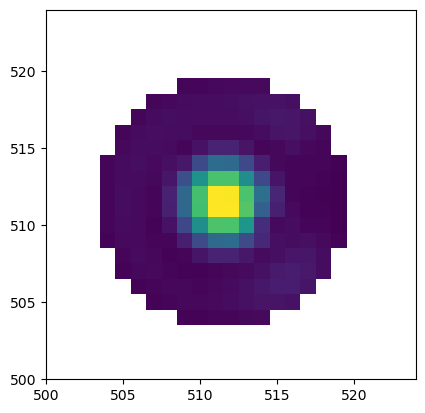

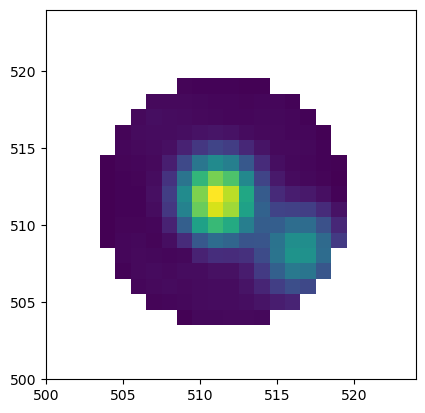

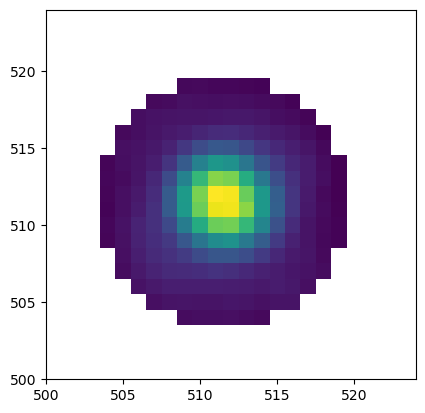

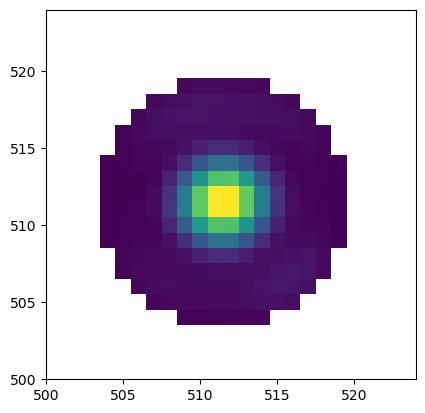

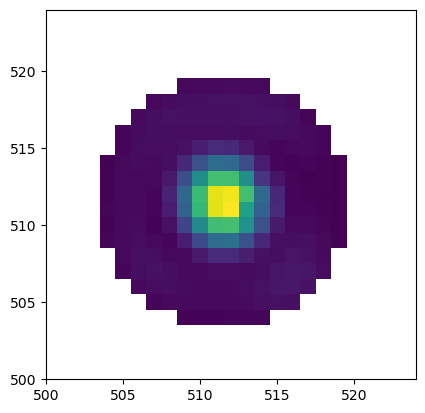

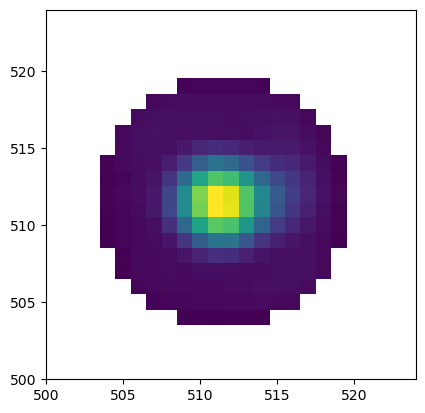

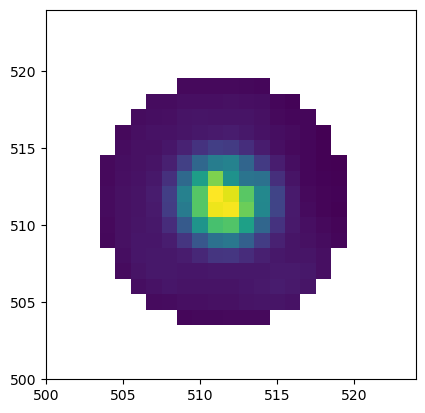

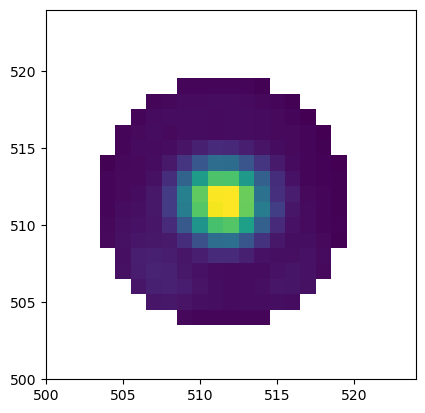

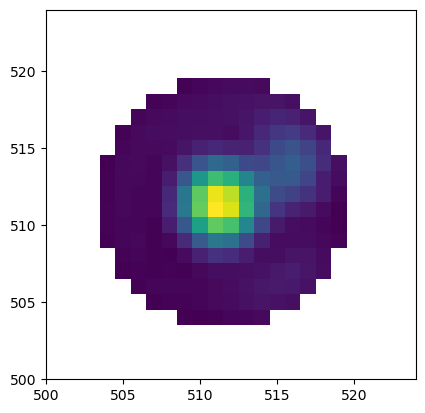

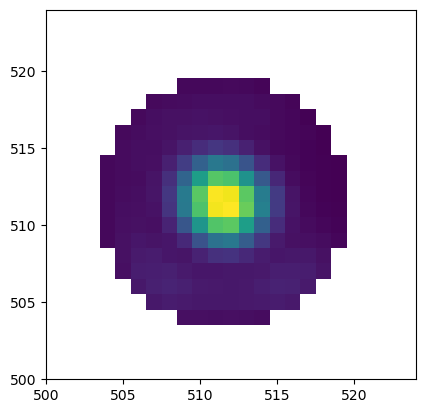

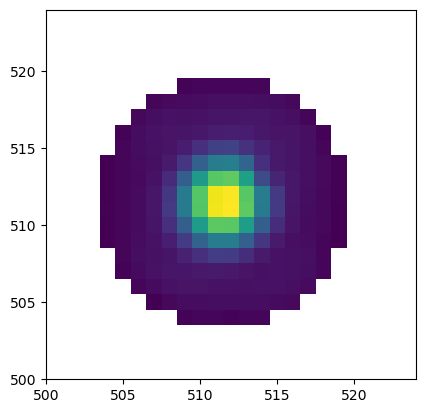

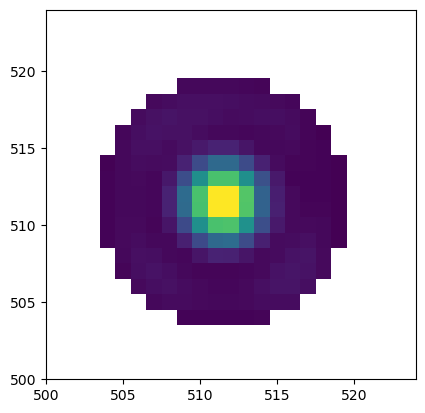

In [58]:
for i in range(len(sin_st)):
        subtract_star(star_data(path_sin, i), med_arr)

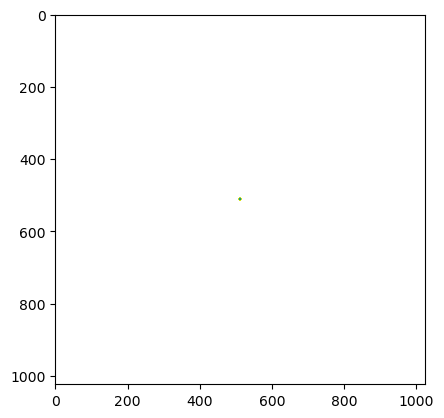

In [27]:
subtract_star(star_data(path_sin, 5), med_arr)

# .reg files
1. Want to open them
2. Want to be able to read them
3. Search for key word circle
4. Save x and y coordinate
    - Are all coordinates equally long? --> if not begin next at ,
    - Do not save radius too

In [214]:
def find_x_y_reg(file, loc_circle, sep):
    ''' Opens the .reg file and returns the x and y coordinate in the file. loc_circle is the number of the line
    where the information on the circle is stored and sep is the thing used for seperating the x and y coord. '''
    with open(file, 'rt') as reg:
        data_reg = reg.readlines()
        data_reg = data_reg[loc_circle]
    
    first, second = data_reg.find(sep), data_reg.rfind(sep)
    return float(data_reg[7:first]), float(data_reg[(first+1):second])

In [215]:
x, y = find_x_y_reg(f'{star}/{date}/{star}_{date}.reg', 3, ',')

In [213]:
x

517.82253